## Data Exploration & Preprocessing 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#### loda data

In [44]:
train = pd.read_csv('./data/train.csv',header=0)
test = pd.read_csv('./data/test.csv',header=0)

/tmp/ipykernel_94232/1599941892.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('./data/train.csv',header=0)


#### Display data train and test

In [4]:
train.head(10)

id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0  p01_0   p01  06:10:00      NaN      NaN      9.6      NaN      NaN   
1  p01_1   p01  06:25:00      NaN      NaN      9.7      NaN      NaN   
2  p01_2   p01  06:40:00      NaN      NaN      9.2      NaN      NaN   
3  p01_3   p01  06:55:00      NaN      NaN      8.7      NaN      NaN   
4  p01_4   p01  07:10:00      NaN      NaN      8.4      NaN      NaN   
5  p01_5   p01  07:25:00      NaN      NaN      8.1      NaN      NaN   
6  p01_6   p01  07:40:00      NaN      NaN      8.3      NaN      NaN   
7  p01_7   p01  07:55:00      NaN      NaN      9.6      NaN      NaN   
8  p01_8   p01  08:10:00      NaN      NaN     11.1      NaN      NaN   
9  p01_9   p01  08:25:00      NaN      NaN     11.8      NaN      NaN   

   bg-5:30  bg-5:25  ...  activity-0:40  activity-0:35  activity-0:30  \
0      9.7      NaN  ...            NaN            NaN            NaN   
1      9.2      NaN  ...            NaN            NaN            NaN   
2      8.7      NaN  ...            NaN            NaN            NaN   
3      8.4      NaN  ...            NaN            NaN            NaN   
4      8.1      NaN  ...            NaN            NaN            NaN   
5      8.3      NaN  ...            NaN            NaN            NaN   
6      9.6      NaN  ...            NaN            NaN            NaN   
7     11.1      NaN  ...            NaN            NaN            NaN   
8     11.8      NaN  ...            NaN            NaN            NaN   
9     12.8      NaN  ...            NaN            NaN            NaN   

   activity-0:25  activity-0:20  activity-0:15  activity-0:10  activity-0:05  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   
5            NaN            NaN            NaN            NaN            NaN   
6            NaN            NaN            NaN            NaN            NaN   
7            NaN            NaN            NaN            NaN            NaN   
8            NaN            NaN            NaN            NaN            NaN   
9            NaN            NaN            NaN            NaN            NaN   

   activity-0:00  bg+1:00  
0            NaN     13.4  
1            NaN     12.8  
2            NaN     15.5  
3            NaN     14.8  
4            NaN     12.7  
5            NaN     11.4  
6            NaN     11.9  
7            NaN     15.1  
8            NaN     17.1  
9            NaN     17.9  

[10 rows x 508 columns]

In [5]:
test.head(10)

id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0  p01_8459   p01  06:45:00      NaN      9.2      NaN      NaN     10.2   
1  p01_8460   p01  11:25:00      NaN      NaN      9.9      NaN      NaN   
2  p01_8461   p01  14:45:00      NaN      5.5      NaN      NaN      5.5   
3  p01_8462   p01  04:30:00      NaN      3.4      NaN      NaN      3.9   
4  p01_8463   p01  04:20:00      NaN      NaN      8.3      NaN      NaN   
5  p01_8464   p01  00:20:00      NaN      NaN      9.6      NaN      NaN   
6  p01_8465   p01  11:15:00      NaN      NaN     10.0      NaN      NaN   
7  p01_8466   p01  04:15:00      NaN      NaN      7.6      NaN      NaN   
8  p01_8467   p01  05:50:00      NaN      NaN      4.4      NaN      NaN   
9  p01_8468   p01  12:00:00      NaN      NaN     14.2      NaN      NaN   

   bg-5:30  bg-5:25  ...  activity-0:45  activity-0:40  activity-0:35  \
0      NaN      NaN  ...            NaN            NaN            NaN   
1      9.4      NaN  ...            NaN            NaN            NaN   
2      NaN      NaN  ...            NaN            NaN            NaN   
3      NaN      NaN  ...            NaN            NaN            NaN   
4     10.0      NaN  ...            NaN            NaN            NaN   
5     10.9      NaN  ...            NaN            NaN            NaN   
6      9.9      NaN  ...            NaN            NaN            NaN   
7      9.7      NaN  ...            NaN            NaN            NaN   
8      5.3      NaN  ...            NaN            NaN            NaN   
9     14.4      NaN  ...            NaN            NaN            NaN   

   activity-0:30  activity-0:25  activity-0:20  activity-0:15  activity-0:10  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN           Walk   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   
5            NaN            NaN            NaN            NaN            NaN   
6            NaN            NaN            NaN            NaN            NaN   
7            NaN            NaN            NaN            NaN            NaN   
8            NaN            NaN            NaN            NaN            NaN   
9            NaN            NaN            NaN            NaN            NaN   

   activity-0:05  activity-0:00  
0            NaN            NaN  
1           Walk           Walk  
2            NaN            NaN  
3            NaN            NaN  
4            NaN            NaN  
5            NaN            NaN  
6            NaN            NaN  
7            NaN            NaN  
8            NaN            NaN  
9            NaN            NaN  

[10 rows x 507 columns]

In [102]:
print(f'Training data have {train.shape[0]} rows and {train.shape[1]} cols')
print(f'Training data have {test.shape[0]} rows and {test.shape[1]} cols')

Training data have 177024 rows and 508 cols
Training data have 3644 rows and 507 cols


In [28]:
train.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Data columns (total 508 columns):
 #    Column         Non-Null Count   Dtype  
---   ------         --------------   -----  
 0    id             177024 non-null  object 
 1    p_num          177024 non-null  object 
 2    time           177024 non-null  object 
 3    bg-5:55        149770 non-null  float64
 4    bg-5:50        158533 non-null  float64
 5    bg-5:45        163364 non-null  float64
 6    bg-5:40        149766 non-null  float64
 7    bg-5:35        158254 non-null  float64
 8    bg-5:30        163770 non-null  float64
 9    bg-5:25        149763 non-null  float64
 10   bg-5:20        157973 non-null  float64
 11   bg-5:15        164174 non-null  float64
 12   bg-5:10        149771 non-null  float64
 13   bg-5:05        157677 non-null  float64
 14   bg-5:00        164585 non-null  float64
 15   bg-4:55        149780 non-null  float64
 16   bg-4:50        157381 non-null  float64
 17   bg-4:45 

In [29]:
test.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 507 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    id             3644 non-null   object 
 1    p_num          3644 non-null   object 
 2    time           3644 non-null   object 
 3    bg-5:55        2660 non-null   float64
 4    bg-5:50        3061 non-null   float64
 5    bg-5:45        3158 non-null   float64
 6    bg-5:40        2658 non-null   float64
 7    bg-5:35        3045 non-null   float64
 8    bg-5:30        3169 non-null   float64
 9    bg-5:25        2655 non-null   float64
 10   bg-5:20        3039 non-null   float64
 11   bg-5:15        3179 non-null   float64
 12   bg-5:10        2657 non-null   float64
 13   bg-5:05        3024 non-null   float64
 14   bg-5:00        3193 non-null   float64
 15   bg-4:55        2658 non-null   float64
 16   bg-4:50        3009 non-null   float64
 17   bg-4:45        3207 non-null   

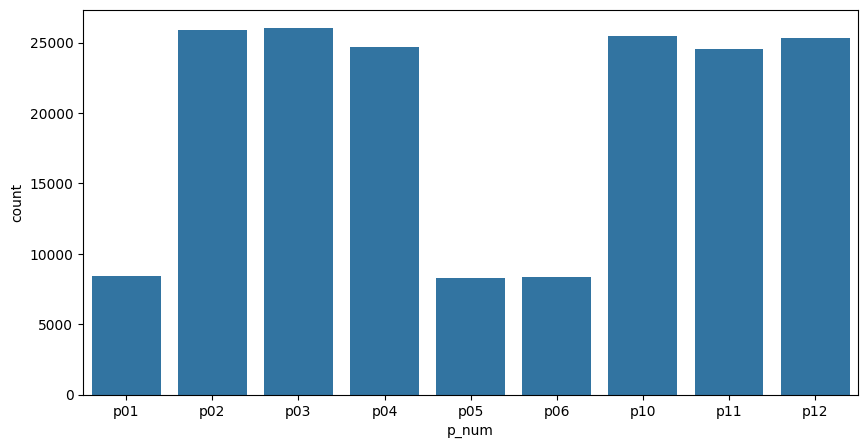

In [30]:
count_train = train.p_num.value_counts().sort_index()
count_train
plt.figure(figsize=(10,5))
sns.countplot(x='p_num', data=train)
plt.show()

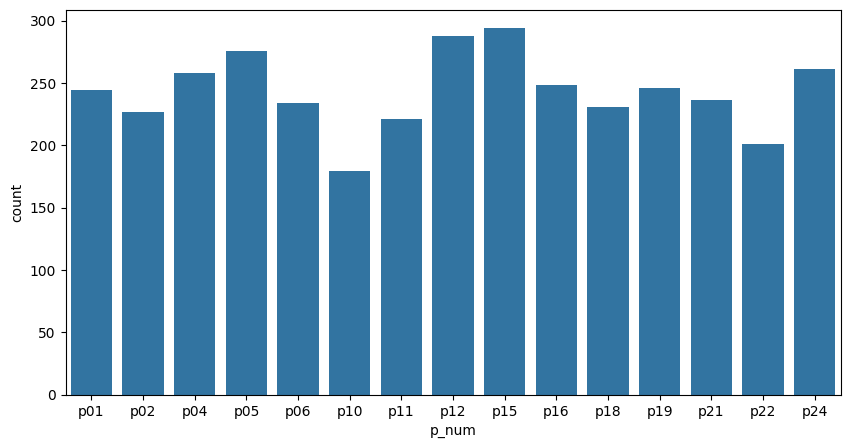

In [31]:
count_test = test.p_num.value_counts().sort_index()
count_test
plt.figure(figsize=(10,5))
sns.countplot(x='p_num', data=test)
plt.show()

### Data pre-preparation

#### In time series data, timestamp information is very important to capture features such as periodicity, trend, etc. of time. We transform the time column and extract ‘hour’ as a new feature to add to the data

In [45]:
# date conversion
train.time = pd.to_datetime(train.time, format='%H:%M:%S')
test.time = pd.to_datetime(test.time, format='%H:%M:%S')

train['hour'] = train.time.dt.hour
test['hour'] = test.time.dt.hour

train['time_min'] = train['time'].dt.hour * 60 + train['time'].dt.minute
test['time_min'] = test['time'].dt.hour * 60 + test['time'].dt.minute

train['sin_time'] = np.sin(2 * np.pi * train['time_min'] / 1440)
train['cos_time'] = np.cos(2 * np.pi * train['time_min'] / 1440)

test['sin_time'] = np.sin(2 * np.pi * test['time_min'] / 1440)
test['cos_time'] = np.cos(2 * np.pi * test['time_min'] / 1440)

#### Visualisation of target value 'bg+1:00'

In [6]:
target = 'bg+1:00'
#Stats of the target variable

train[target].describe()

count    177024.000000
mean          8.277045
std           2.996398
min           2.200000
25%           6.100000
50%           7.700000
75%           9.900000
max          27.800000
Name: bg+1:00, dtype: float64

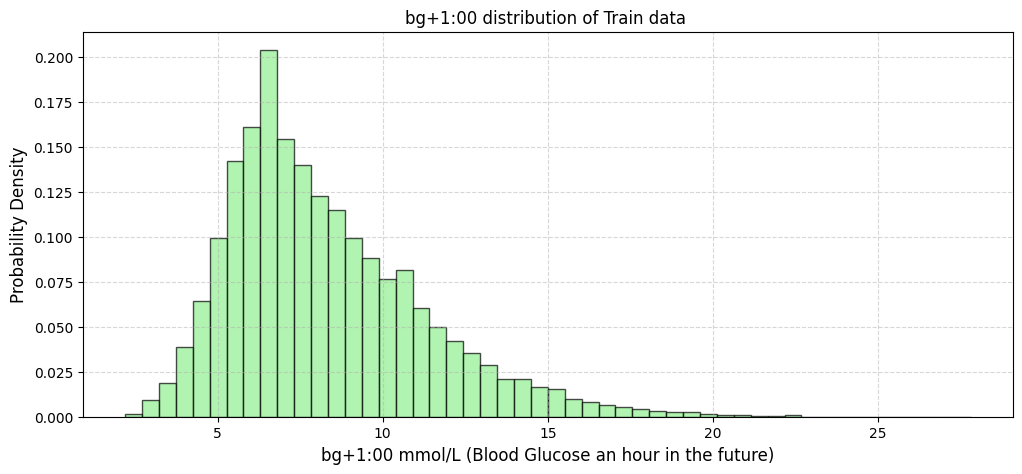

In [34]:
plt.figure(figsize=(12, 5))
train['bg+1:00'].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', density=True, alpha=0.7)
plt.title('bg+1:00 distribution of Train data ')
plt.xlabel('bg+1:00 mmol/L (Blood Glucose an hour in the future)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/tmp/ipykernel_5889/3616641417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='hour', y=target, data=train, palette='viridis')


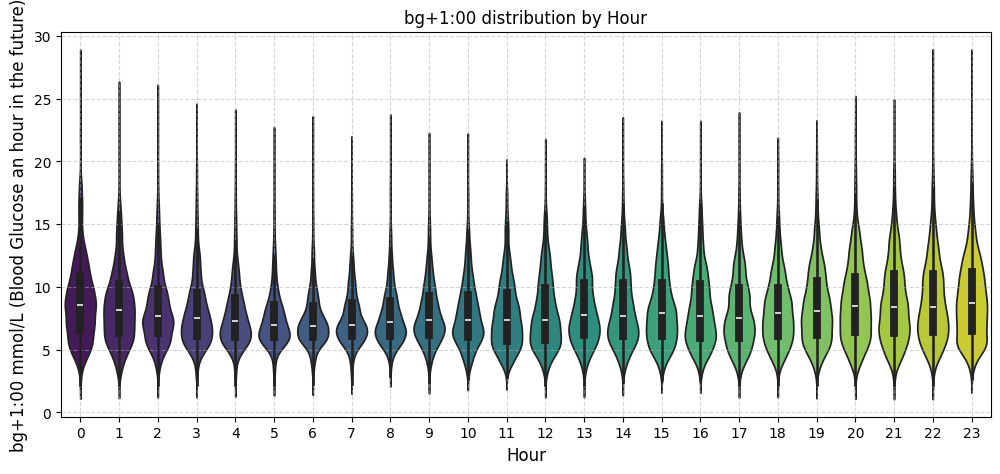

In [40]:
# Violin plot of target distribution by hour
plt.figure(figsize=(12, 5))
sns.violinplot(x='hour', y=target, data=train, palette='viridis')
plt.title('bg+1:00 distribution by Hour')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('bg+1:00 mmol/L (Blood Glucose an hour in the future)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


/tmp/ipykernel_5889/1199699378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='p_num', y=target, data=train, palette='muted')


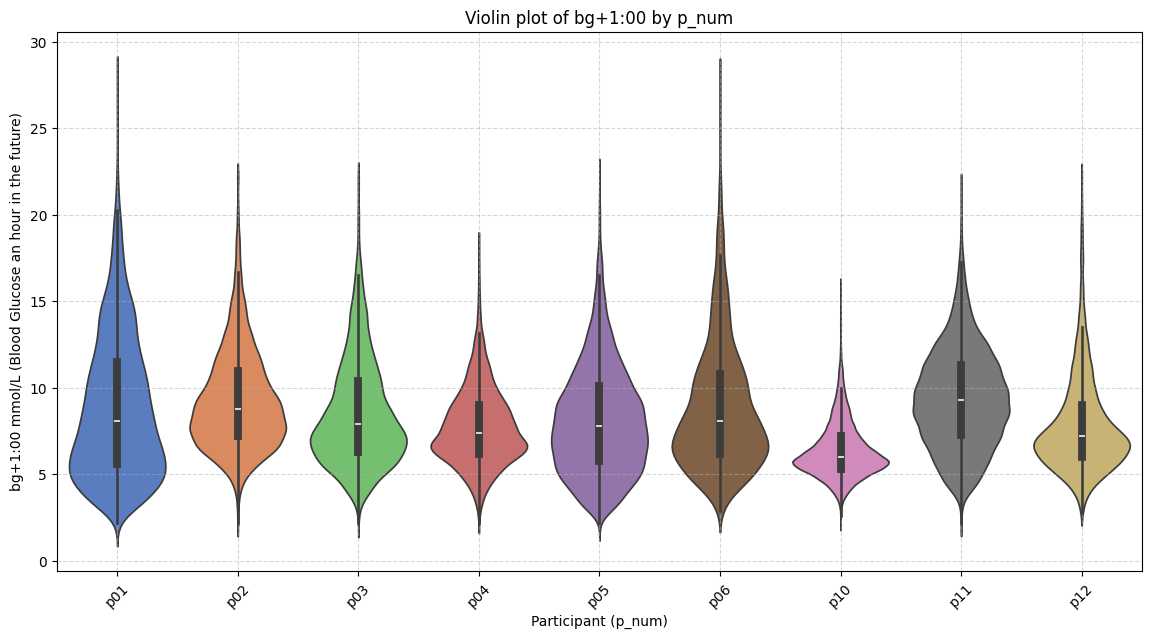

In [41]:
# Distribution of the target variable by Participant    
plt.figure(figsize=(14, 7))
sns.violinplot(x='p_num', y=target, data=train, palette='muted')
plt.title('Violin plot of bg+1:00 by p_num')
plt.xlabel('Participant (p_num)')
plt.ylabel('bg+1:00 mmol/L (Blood Glucose an hour in the future)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##### Visualisation of bg

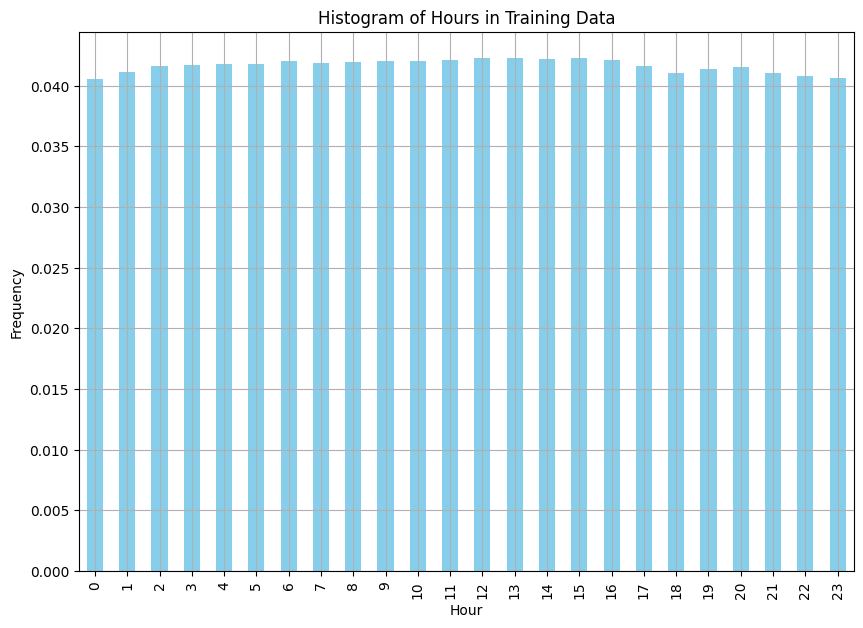

In [16]:
plt.figure(figsize=(10, 7))
train['hour'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of Hours in Training Data')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

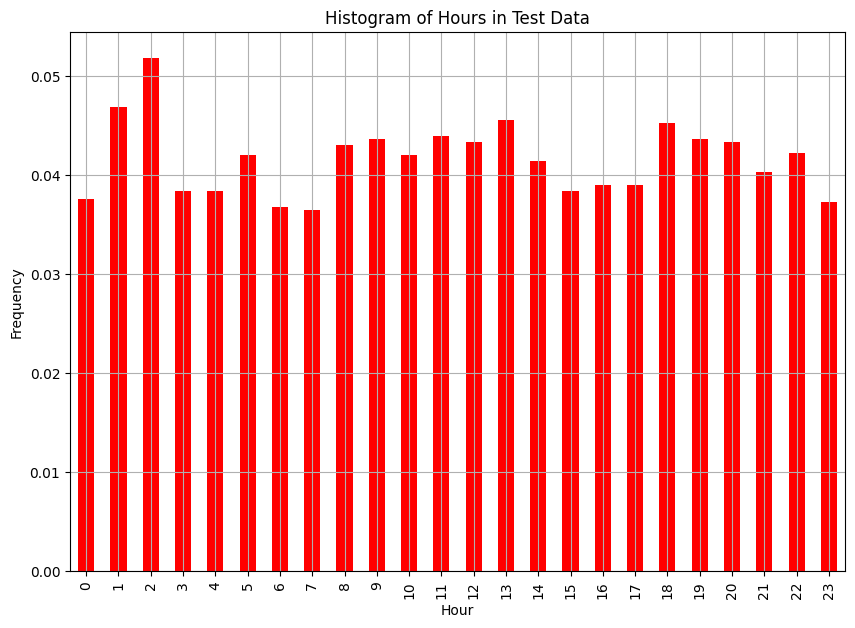

In [17]:
plt.figure(figsize=(10, 7))
test['hour'].value_counts(normalize=True).sort_index().plot(kind='bar', color='red')
plt.title('Histogram of Hours in Test Data')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

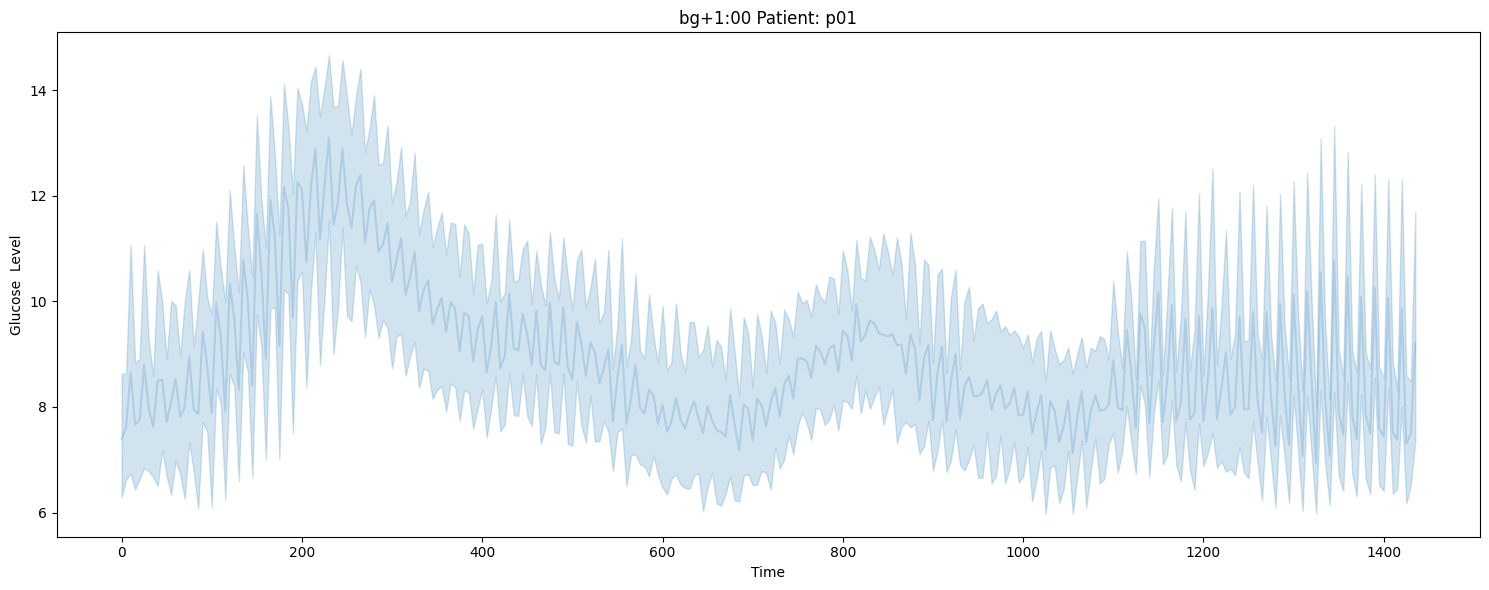

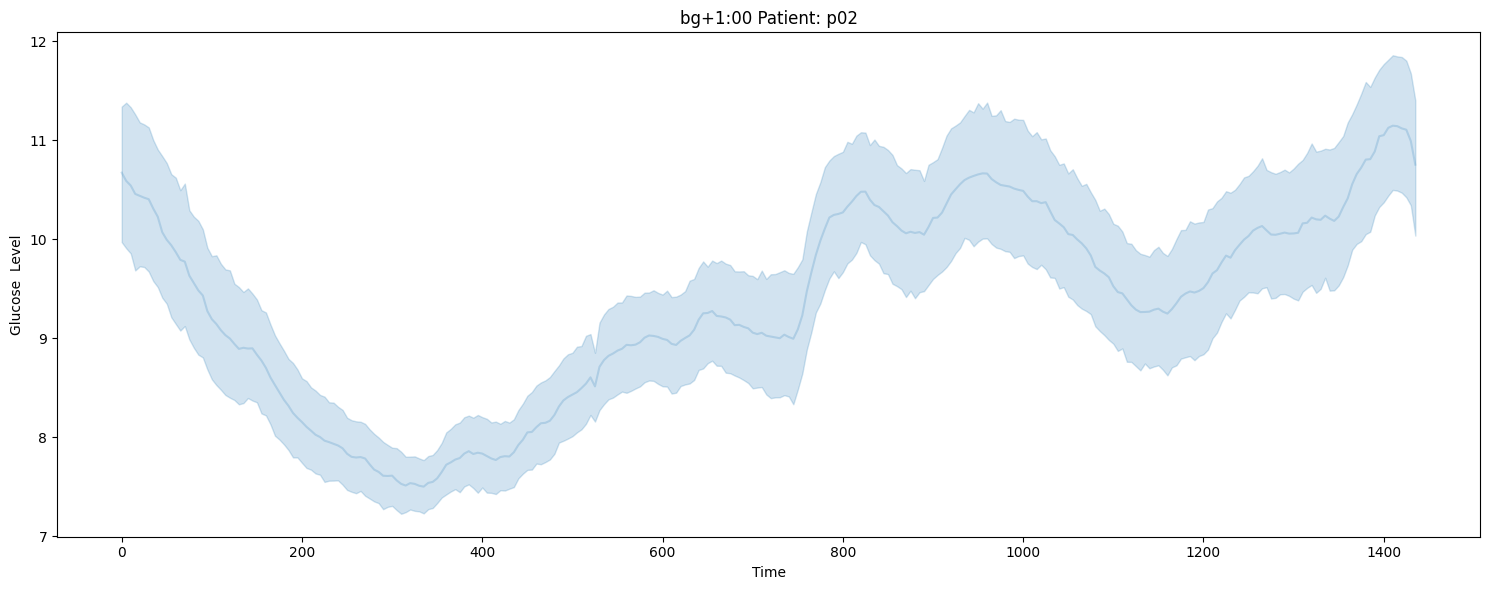

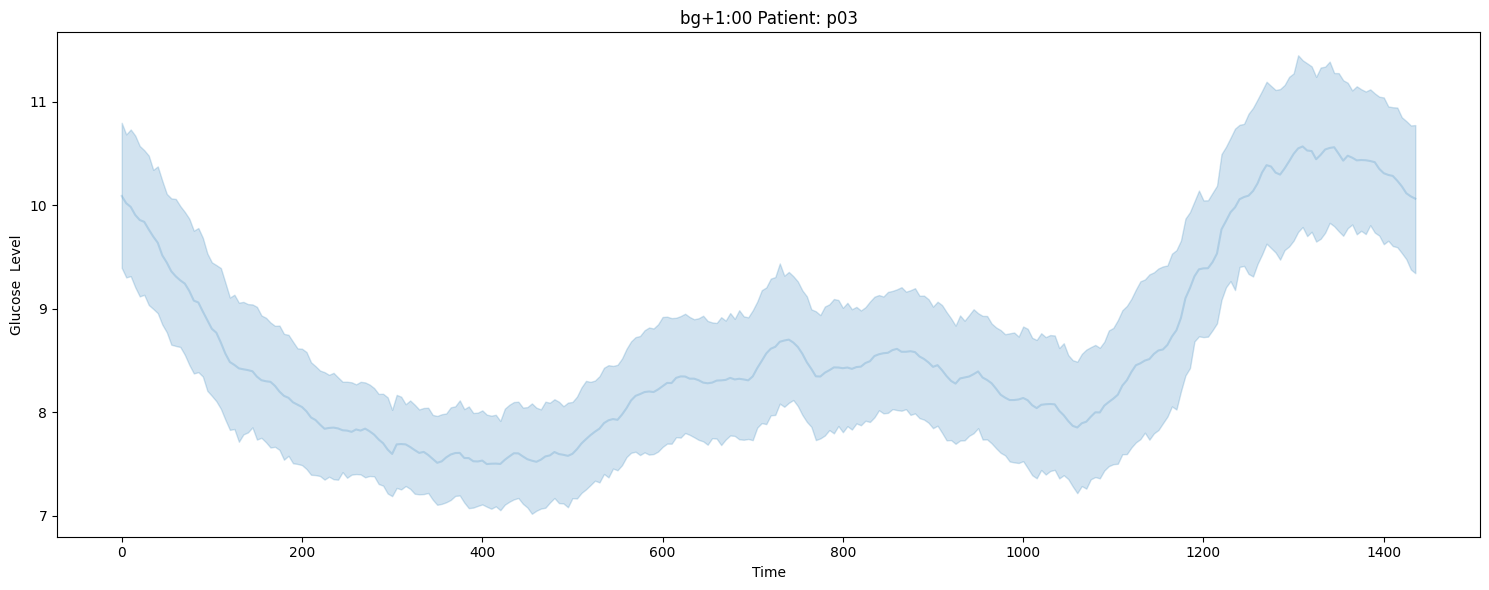

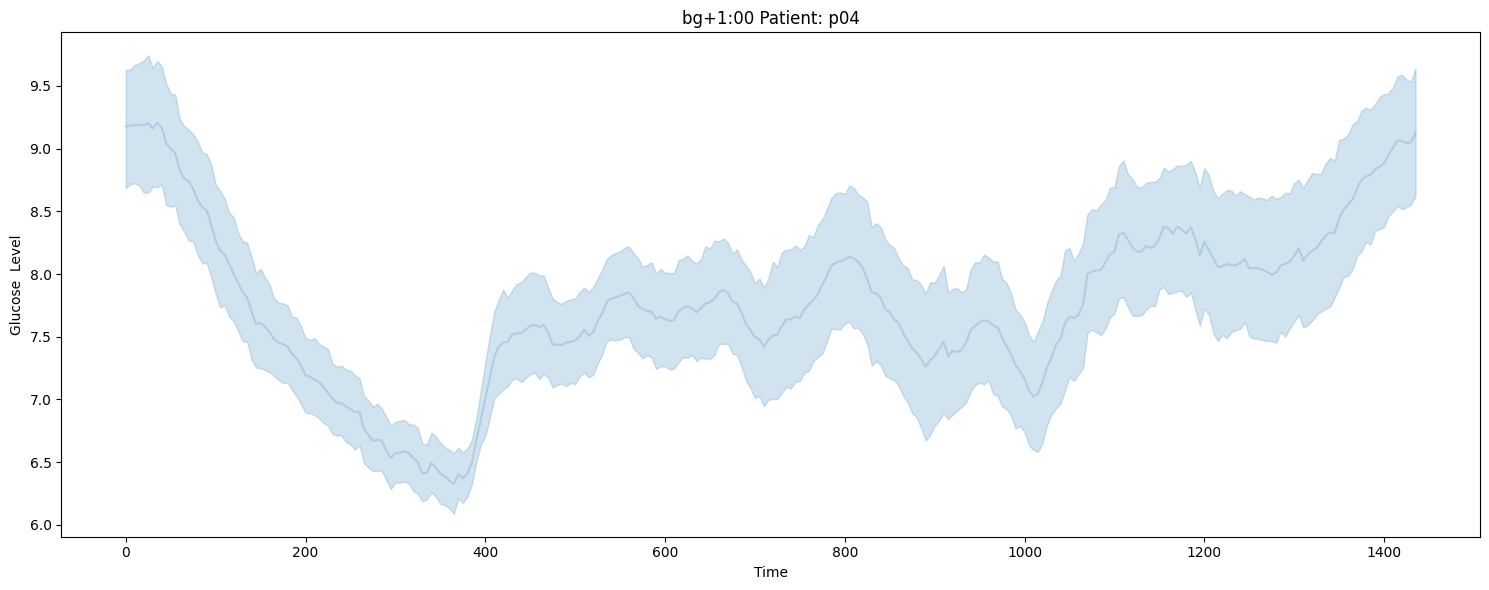

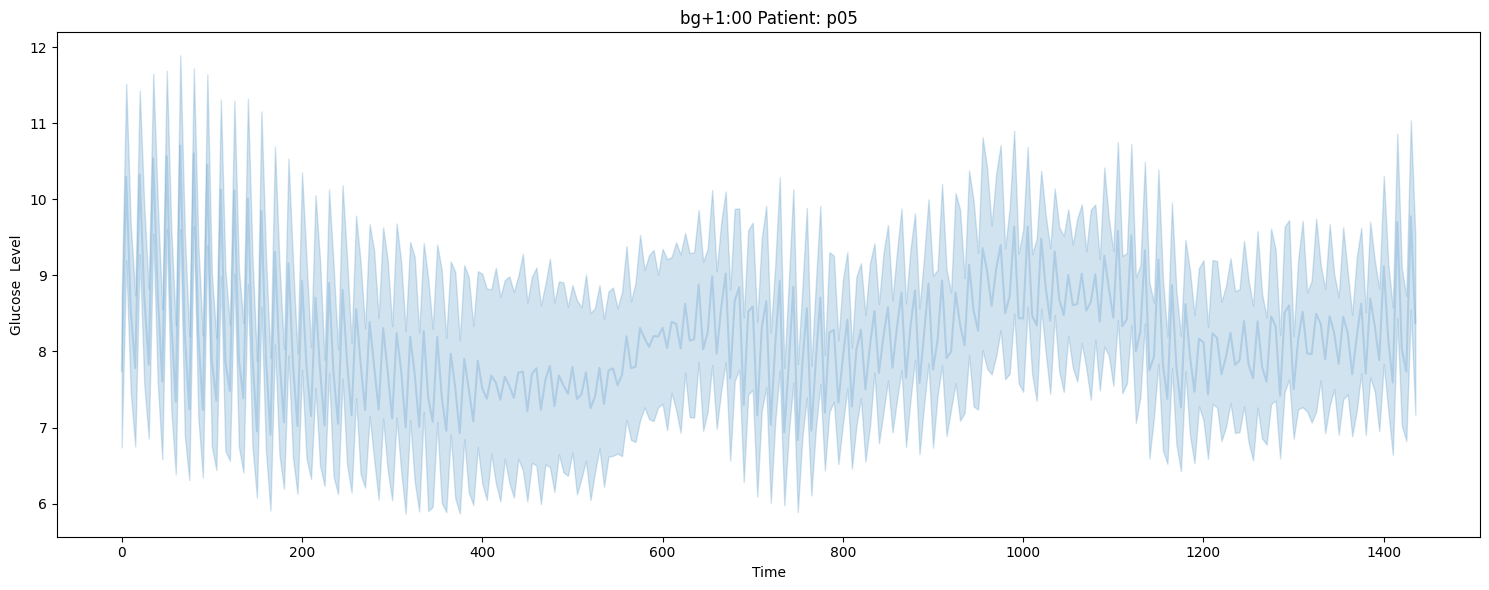

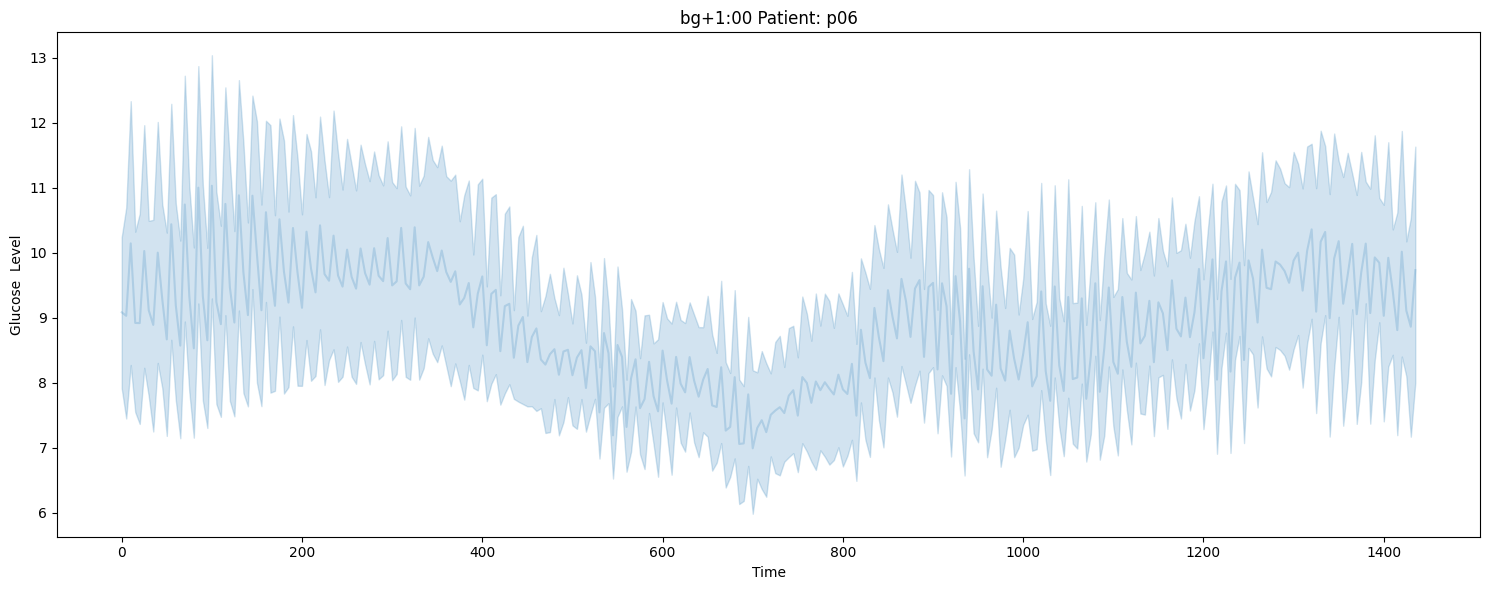

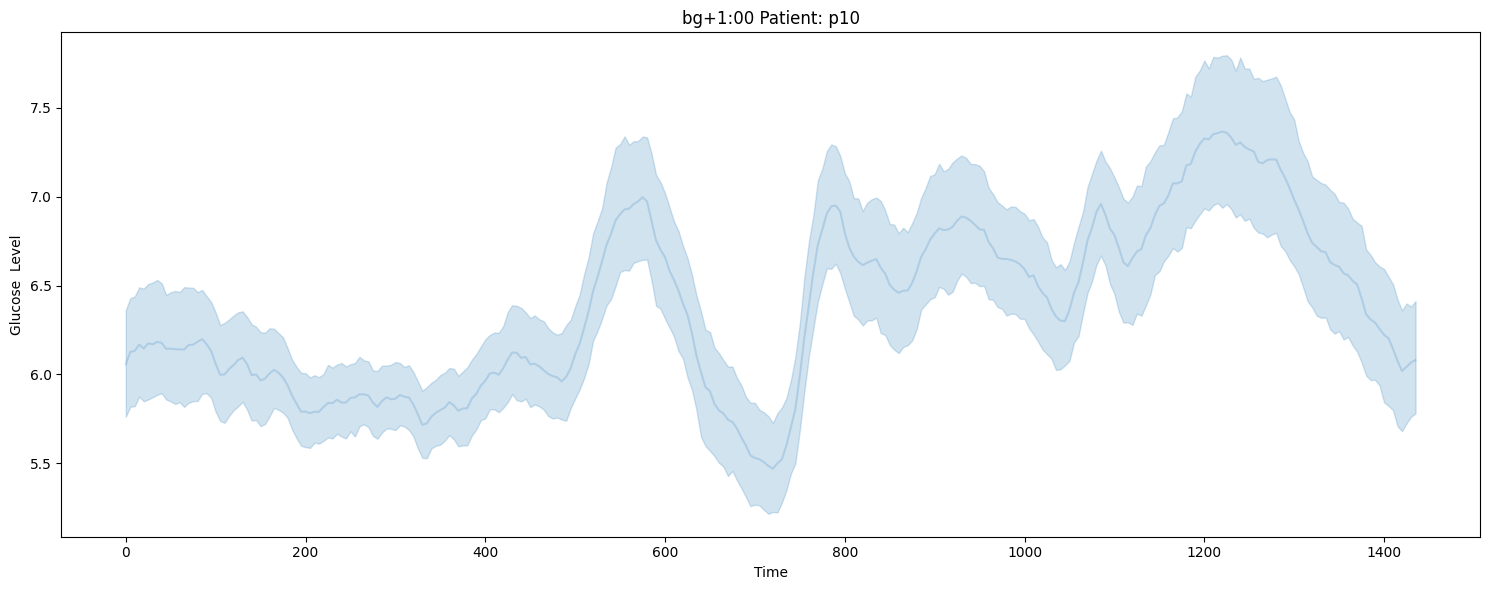

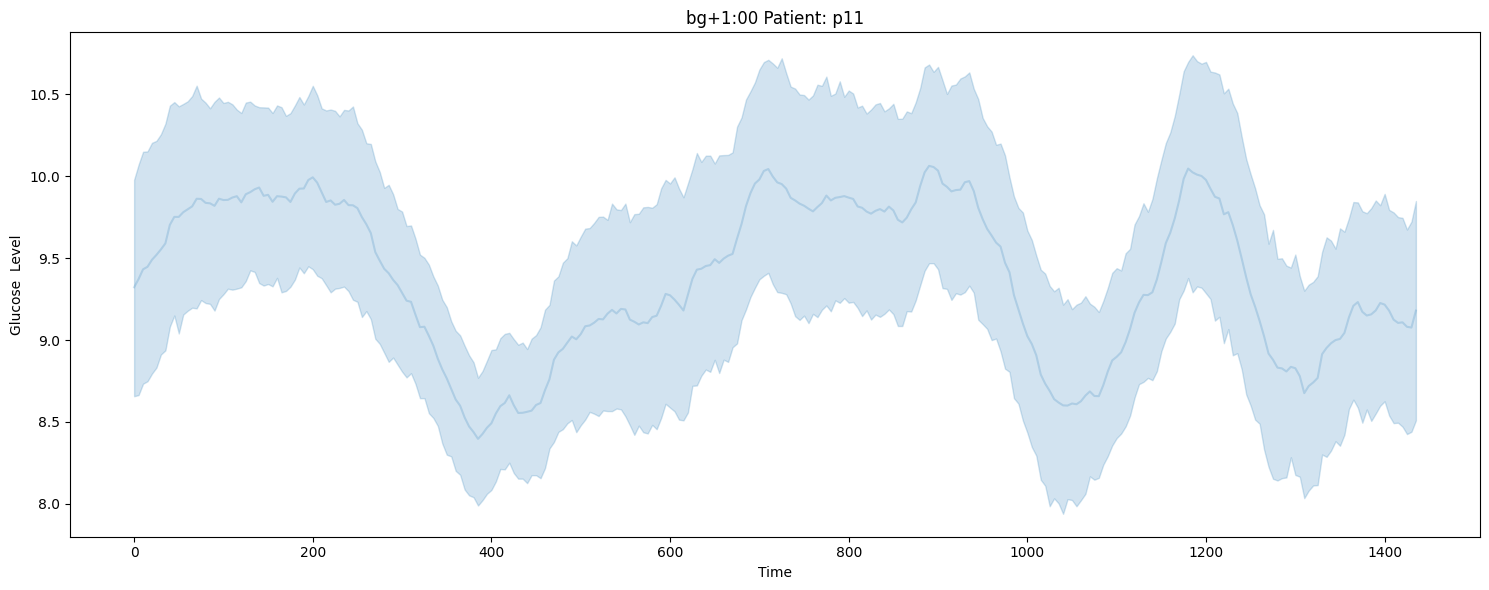

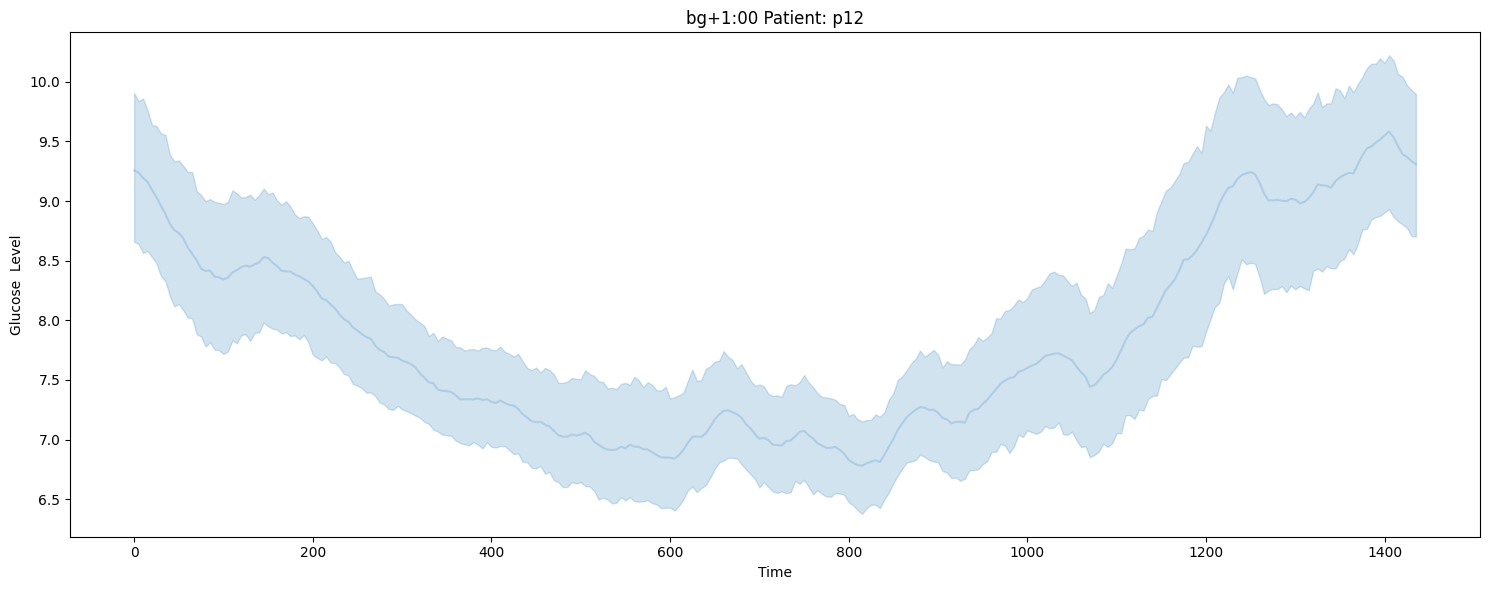

In [18]:
# Evolution of the target variable over time
for p_num in train['p_num'].unique():
    plt.figure(figsize = (15, 6))
    df = train[train['p_num'] == p_num]
    sns.lineplot(x = 'time_min', y = target, data = df, alpha = 0.2)
    plt.title(target + ' Patient: ' + p_num)
    plt.xlabel('Time')
    plt.ylabel('Glucose  Level')
    plt.tight_layout() 
    plt.show()

#### Visualisation of feature 'carbs'

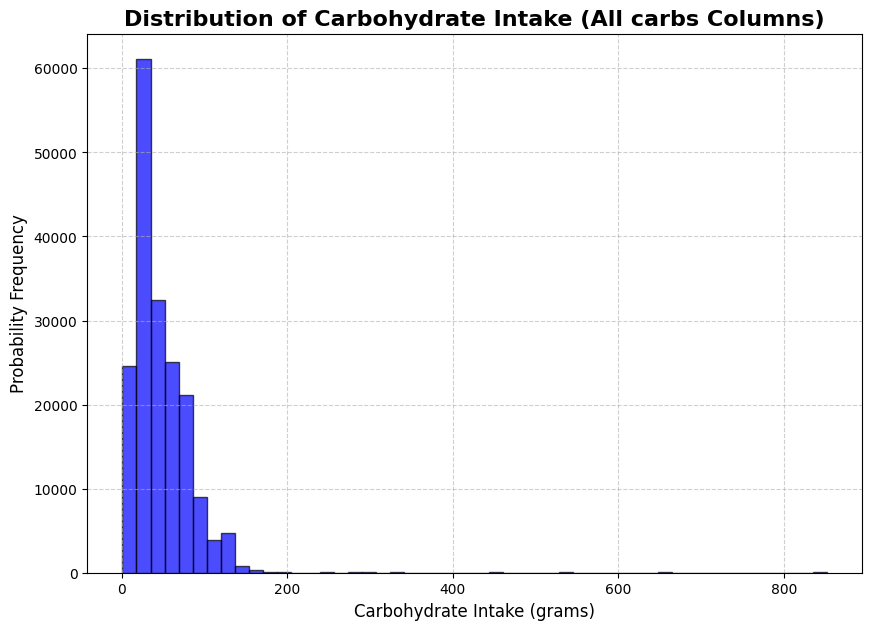

In [19]:
carbs_cols = [col for col in train.columns if 'carbs' in col]
all_carbs_data = pd.concat([train[col] for col in carbs_cols])

plt.figure(figsize = (10,7))
all_carbs_data.plot(kind = 'hist', bins = 50, color = 'blue', edgecolor = "black", alpha = 0.7)
plt.title('Distribution of Carbohydrate Intake (All carbs Columns)', fontsize=16, fontweight='bold')
plt.xlabel('Carbohydrate Intake (grams)', fontsize=12)
plt.ylabel('Probability Frequency', fontsize=12)
plt.grid(True, linestyle = '--', alpha =0.6)
plt.show()

#Carbs represents the total carbohydrates consumed In grammes in the last 5 minutes, we can see that there are many NaNs in the carbs feature in the data.

##### Visualisation of heart rating

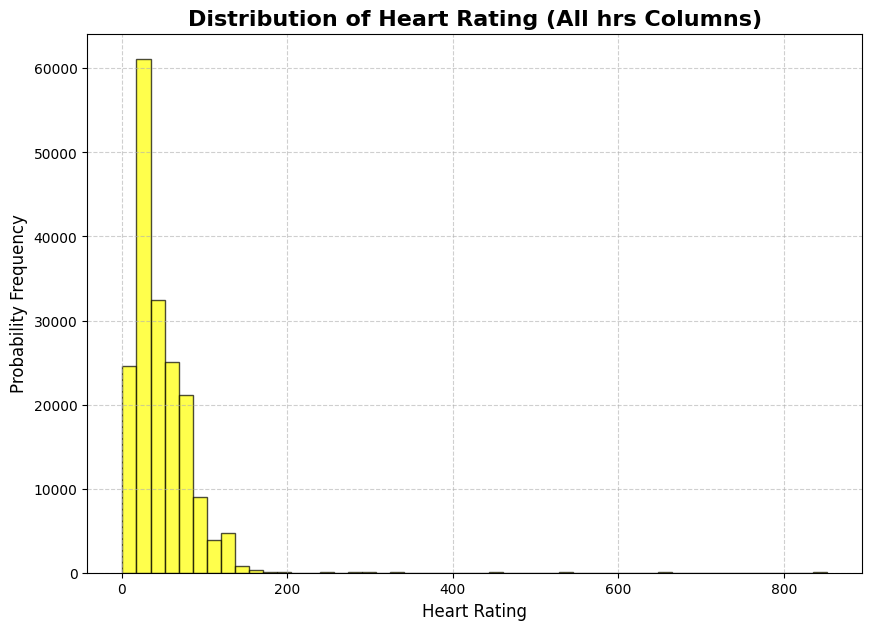

In [21]:
hr_cols = [col for col in train.columns if 'hr' in col]
all_hr_data = pd.concat([train[col] for col in hr_cols])

plt.figure(figsize = (10,7))
all_carbs_data.plot(kind = 'hist', bins = 50, color = 'yellow', edgecolor = "black", alpha = 0.7)
plt.title('Distribution of Heart Rating (All hrs Columns)', fontsize=16, fontweight='bold')
plt.xlabel('Heart Rating', fontsize=12)
plt.ylabel('Probability Frequency', fontsize=12)
plt.grid(True, linestyle = '--', alpha =0.6)
plt.show()

In [46]:
def fill_na_with_linear_interpolation(df, prefixe):
    # Filter out all columns containing ‘bg’
    cols = [col for col in df.columns if col.startswith(prefixe)]
    
    # Linearly interpolate each row   
    df[cols] = df[cols].interpolate(method='linear', axis=1, limit_direction='both')
    
    return df



#### Blood Glucose

In [47]:
train = fill_na_with_linear_interpolation(train, 'bg')
test = fill_na_with_linear_interpolation(test, 'bg')

In [9]:
def actual_time(df, col_var):
    df[['hours', 'minutes']] = df[col_var].str.extract('(-?\d+):(\d+)')
    df['time_diff'] = df['hours'].astype(int) * 60 - df['minutes'].astype(int)
    
    # Calculate actual time in minutes for each bg measurement
    df['actual_time'] = df['time_min'] + df['time_diff']
    
    df = df.drop(columns=['hours', 'minutes', 'time_diff'])
    
    return df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_94232/986835876.py:2: SyntaxWarning: invalid escape sequence '\d'
  df[['hours', 'minutes']] = df[col_var].str.extract('(-?\d+):(\d+)')


In [109]:
bg_columns = [col for col in train.columns if col.startswith('bg-')]
bg_df = pd.melt(train, id_vars=['id', 'time_min'], value_vars=bg_columns, var_name='bg_time', value_name='bg_value')
bg_df = actual_time(bg_df, 'bg_time')
bg_df.head(10)

id  time_min  bg_time  bg_value  actual_time
0  p01_0       370  bg-5:55       9.6           15
1  p01_1       385  bg-5:55       9.7           30
2  p01_2       400  bg-5:55       9.2           45
3  p01_3       415  bg-5:55       8.7           60
4  p01_4       430  bg-5:55       8.4           75
5  p01_5       445  bg-5:55       8.1           90
6  p01_6       460  bg-5:55       8.3          105
7  p01_7       475  bg-5:55       9.6          120
8  p01_8       490  bg-5:55      11.1          135
9  p01_9       505  bg-5:55      11.8          150


Number of remaining NaN values: 0


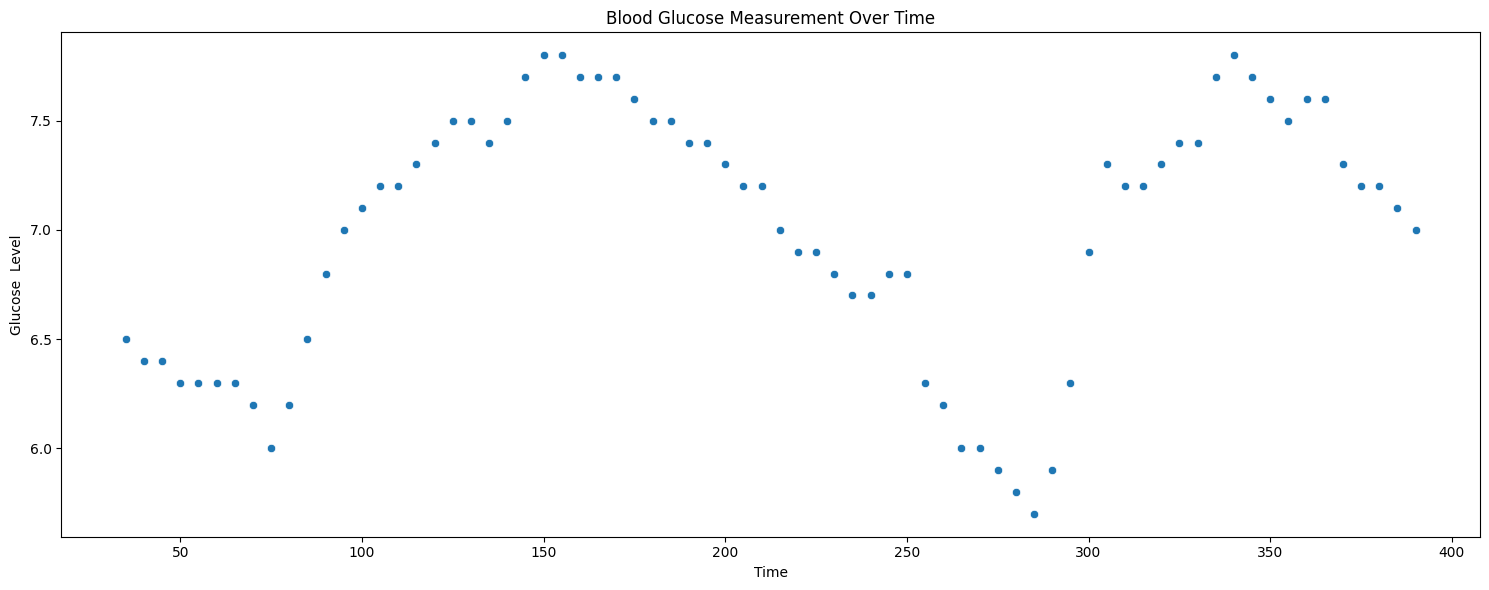

In [113]:
nan_count = bg_df['bg_value'].isna().sum()
print(f"\nNumber of remaining NaN values: {nan_count}")

plt.figure(figsize=(15, 6))
sns.scatterplot(x='actual_time', y='bg_value', data=bg_df[bg_df["id"] == "p03_5"])   
plt.title('Blood Glucose Measurement Over Time')
plt.xlabel('Time')
plt.ylabel('Glucose  Level')
plt.tight_layout() 
plt.show()




#### train dataset insulin NaN 

In [48]:
# Find the columns that contain the word 'insulin'
insulin_cols = [col for col in train.columns if 'insulin' in col]

# Find the rows where all insulin columns are NaN
insulin_nan_rows = train[insulin_cols].isna().all(axis=1)

# Filter out the rows where all insulin columns are NaN
df_train = train[~insulin_nan_rows]

print(f"train dataset initial: {train.shape[0]}")
print(f"train dataset filted: {df_train.shape[0]}")

train dataset initial: 177024
train dataset filted: 167659


#### Encoding activity

In [49]:
from sklearn.preprocessing import LabelEncoder

activity_train_cols = [col for col in df_train.columns if 'activity' in col]
activity_test_cols = [col for col in test.columns if 'activity' in col]

label_encoder = LabelEncoder()

#emncode activity columns
for col in activity_train_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col].fillna('Unknown'))
for col in activity_test_cols:
    test[col] = label_encoder.fit_transform(test[col].fillna('Unknown'))









/tmp/ipykernel_94232/964767655.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = label_encoder.fit_transform(df_train[col].fillna('Unknown'))
/tmp/ipykernel_94232/964767655.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = label_encoder.fit_transform(df_train[col].fillna('Unknown'))
/tmp/ipykernel_94232/964767655.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [50]:
df_test = test.copy()

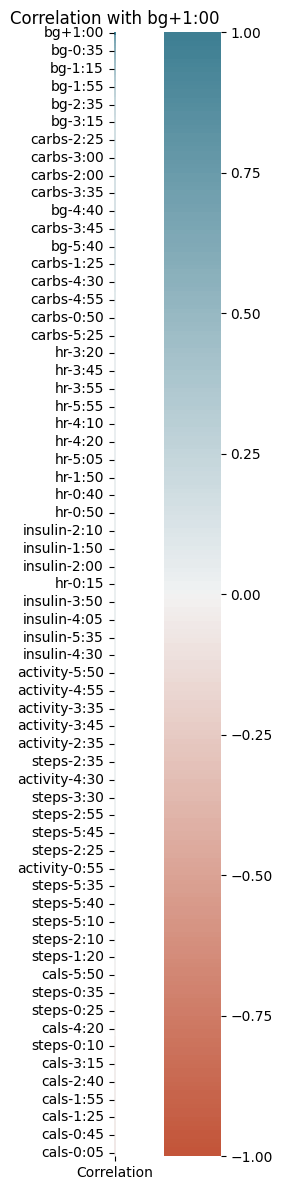

In [51]:
train_corr = df_train.drop(columns=['hour', 'time_min', 'sin_time', 'cos_time', 'id', 'p_num'], axis=1)

correlations_with_bg = train_corr.corrwith(train_corr['bg+1:00'])
correlations_with_bg = correlations_with_bg.sort_values(ascending=False)
correlation_df = pd.DataFrame(correlations_with_bg, columns=['Correlation'])

# Create the heatmap
plt.figure(figsize=(10, 12))
axis_corr = sns.heatmap(
    correlation_df,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    fmt='.2f'
)

plt.title("Correlation with bg+1:00")
plt.tight_layout()
plt.show()

#### Normalization

In [52]:
df_train = df_train.drop(columns=['bg+1:00'], axis=1)

In [53]:
train_bg_cols = [col for col in df_train.columns if 'bg' in col]
test_bg_cols = [col for col in df_test.columns if 'bg' in col]


train_insulin_cols = [col for col in df_train.columns if 'insulin' in col]
test_insulin_cols = [col for col in df_test.columns if 'insulin' in col]

train_carbs_cols = [col for col in df_train.columns if 'carbs' in col]
test_carbs_cols = [col for col in df_test.columns if 'carbs' in col]

train_hr_cols = [col for col in df_train.columns if 'hr' in col]
test_hr_cols = [col for col in df_test.columns if 'hr' in col]

train_steps_cols = [col for col in df_train.columns if 'steps' in col]
test_steps_cols = [col for col in df_test.columns if 'steps' in col]

train_activity_cols = [col for col in df_train.columns if 'activity' in col]
test_activity_cols = [col for col in df_test.columns if 'activity' in col]

train_cal_cols = [col for col in df_train.columns if 'cal' in col]
test_cal_cols = [col for col in df_test.columns if 'cal' in col]

# Initialize scalers
scaler_bg = MinMaxScaler()
scaler_insulin = MinMaxScaler()
scaler_carbs = MinMaxScaler()
scaler_hr = MinMaxScaler()
scaler_steps = MinMaxScaler()
scaler_activity = MinMaxScaler()
scaler_cal = MinMaxScaler()

# train set fit_transform
df_train[train_bg_cols] = scaler_bg.fit_transform(df_train[train_bg_cols])
df_train[train_insulin_cols] = scaler_insulin.fit_transform(df_train[train_insulin_cols])
df_train[train_carbs_cols] = scaler_carbs.fit_transform(df_train[train_carbs_cols])
df_train[train_hr_cols] = scaler_hr.fit_transform(df_train[train_hr_cols])
df_train[train_steps_cols] = scaler_steps.fit_transform(df_train[train_steps_cols])
df_train[train_activity_cols] = scaler_activity.fit_transform(df_train[train_activity_cols])
df_train[train_cal_cols] = scaler_cal.fit_transform(df_train[train_cal_cols])

# test set transform
df_test[test_bg_cols] = scaler_bg.fit_transform(df_test[test_bg_cols])
df_test[test_insulin_cols] = scaler_insulin.fit_transform(df_test[test_insulin_cols])
df_test[test_carbs_cols] = scaler_carbs.fit_transform(df_test[test_carbs_cols])
df_test[test_hr_cols] = scaler_hr.fit_transform(df_test[test_hr_cols])
df_test[test_steps_cols] = scaler_steps.fit_transform(df_test[test_steps_cols])
df_test[test_activity_cols] = scaler_activity.fit_transform(df_test[test_activity_cols])
df_test[test_cal_cols] = scaler_cal.fit_transform(df_test[test_cal_cols])



In [54]:
print(f"train: {df_train.shape}")
print(f"test: {df_test.shape}")

train: (167659, 511)
test: (3644, 511)


In [55]:
df_train.head(10)

id p_num                time   bg-5:55   bg-5:50   bg-5:45   bg-5:40  \
0  p01_0   p01 1900-01-01 06:10:00  0.289062  0.289062  0.289062  0.290365   
1  p01_1   p01 1900-01-01 06:25:00  0.292969  0.292969  0.292969  0.286458   
2  p01_2   p01 1900-01-01 06:40:00  0.273438  0.273438  0.273438  0.266927   
3  p01_3   p01 1900-01-01 06:55:00  0.253906  0.253906  0.253906  0.250000   
4  p01_4   p01 1900-01-01 07:10:00  0.242188  0.242188  0.242188  0.238281   
5  p01_5   p01 1900-01-01 07:25:00  0.230469  0.230469  0.230469  0.233073   
6  p01_6   p01 1900-01-01 07:40:00  0.238281  0.238281  0.238281  0.255208   
7  p01_7   p01 1900-01-01 07:55:00  0.289062  0.289062  0.289062  0.308594   
8  p01_8   p01 1900-01-01 08:10:00  0.347656  0.347656  0.347656  0.356771   
9  p01_9   p01 1900-01-01 08:25:00  0.375000  0.375000  0.375000  0.388021   

    bg-5:35   bg-5:30   bg-5:25  ...  activity-0:25  activity-0:20  \
0  0.291667  0.292969  0.286458  ...       0.714286       0.727273   
1  0.279948  0.273438  0.266927  ...       0.714286       0.727273   
2  0.260417  0.253906  0.250000  ...       0.714286       0.727273   
3  0.246094  0.242188  0.238281  ...       0.714286       0.727273   
4  0.234375  0.230469  0.233073  ...       0.714286       0.727273   
5  0.235677  0.238281  0.255208  ...       0.714286       0.727273   
6  0.272135  0.289062  0.308594  ...       0.714286       0.727273   
7  0.328125  0.347656  0.356771  ...       0.714286       0.727273   
8  0.365885  0.375000  0.388021  ...       0.714286       0.727273   
9  0.401042  0.414062  0.428385  ...       0.714286       0.727273   

   activity-0:15  activity-0:10  activity-0:05  activity-0:00  hour  time_min  \
0       0.727273       0.727273       0.727273       0.727273     6       370   
1       0.727273       0.727273       0.727273       0.727273     6       385   
2       0.727273       0.727273       0.727273       0.727273     6       400   
3       0.727273       0.727273       0.727273       0.727273     6       415   
4       0.727273       0.727273       0.727273       0.727273     7       430   
5       0.727273       0.727273       0.727273       0.727273     7       445   
6       0.727273       0.727273       0.727273       0.727273     7       460   
7       0.727273       0.727273       0.727273       0.727273     7       475   
8       0.727273       0.727273       0.727273       0.727273     8       490   
9       0.727273       0.727273       0.727273       0.727273     8       505   

   sin_time  cos_time  
0  0.999048 -0.043619  
1  0.994056 -0.108867  
2  0.984808 -0.173648  
3  0.971342 -0.237686  
4  0.953717 -0.300706  
5  0.932008 -0.362438  
6  0.906308 -0.422618  
7  0.876727 -0.480989  
8  0.843391 -0.537300  
9  0.806445 -0.591310  

[10 rows x 511 columns]

#### Train dataset

In [56]:

features = ['bg', 'insulin', 'carbs', 'hr', 'steps', 'cals', 'activity']  # features
n_time_steps = 72

windowed_data = []

# Iterate over each row sample
for _, row in df_train.iterrows():
    # initialize an empty list to store the sample data
    sample = []
    
    # extract the sin_time and cos_time
    sin_time = row['sin_time']
    cos_time = row['cos_time']
    
    # for each feature, extract the data for the 72 time steps
    for feature in features:
        feature_data = []
        for i in range(n_time_steps):
            # calculate the hours and minutes
            hours, minutes = divmod(i * 5, 60)  
            col_name = f'{feature}-{hours}:{minutes:02d}'  # e.g., 'bg-1:30'
            
            # append the value of the current feature and time step
            if col_name in row:
                feature_data.append(row[col_name])
            else:
                feature_data.append(np.nan)  # In case of missing columns, fill with NaN
                
        sample.append(feature_data)  # Append this feature's data (72 values) to sample
    
    # Transpose sample to (72, number of features)
    sample = np.array(sample).T
    
    # Add sin_time and cos_time column to the sample
    sin_time_column = np.full((n_time_steps, 1), sin_time)
    cos_time_column = np.full((n_time_steps, 1), cos_time)
    sample = np.concatenate([sample, sin_time_column, cos_time_column], axis=1)
    
    windowed_data.append(sample)

# Convert list to 3D NumPy array: (number of samples, number of time steps, number of features)
windowed_data = np.array(windowed_data)

# Check the shape of the windowed data
print(windowed_data.shape)  


(167659, 72, 9)


In [57]:
import numpy as np

def create_target_window(data, window_size):
    y = []
    for i in range(len(data)):
        y.append(data[i ])  # target value is the next value
    return np.array(y)

train_target = train['bg+1:00'].values

# Create target windows
y_train = create_target_window(train_target, 72)

# output shape
print(f"y_train shape: {y_train.shape}")


y_train shape: (177024,)


In [59]:
X_train = windowed_data
print(f"Shape of X_train: {windowed_data.shape}")  # (number of samples, 72, 7)
print(f"Shape of y_train: {y_train.shape}")  # (number of samples, 9)

Shape of X_train: (167659, 72, 9)
Shape of y_train: (177024,)


In [60]:
# test data
features = ['bg', 'insulin', 'carbs', 'hr', 'steps', 'cals', 'activity']  # features
n_time_steps = 72
windowed_data_test = []

# Iterate over each row sample
for _, row in df_test.iterrows():
    # initialize an empty list to store the sample data
    sample = []
    
    # extract the sin_time and cos_time
    sin_time = row['sin_time']
    cos_time = row['cos_time']
    
    # for each feature, extract the data for the 72 time steps
    for feature in features:
        feature_data = []
        for i in range(n_time_steps):
            # calculate the hours and minutes
            hours, minutes = divmod(i * 5, 60)  
            col_name = f'{feature}-{hours}:{minutes:02d}'  # e.g., 'bg-1:30'
            
            # append the value of the current feature and time step
            if col_name in row:
                feature_data.append(row[col_name])
            else:
                feature_data.append(np.nan)  # In case of missing columns, fill with NaN
                
        sample.append(feature_data)  # Append this feature's data (72 values) to sample
    
    # Transpose sample to (72, number of features)
    sample = np.array(sample).T
    
    # Add sin_time and cos_time column to the sample
    sin_time_column = np.full((n_time_steps, 1), sin_time)
    cos_time_column = np.full((n_time_steps, 1), cos_time)
    sample = np.concatenate([sample, sin_time_column, cos_time_column], axis=1)
    
    # Add this sample to windowed_data
    windowed_data_test.append(sample)

# Convert list to 3D NumPy array: (number of samples, number of time steps, number of features)
windowed_data_test = np.array(windowed_data_test)

# Check the shape of the windowed data
print(windowed_data_test.shape)  # Should be (number of samples, 72, number of features + 2 for time)


(3644, 72, 9)


#### masker

In [61]:
X_train = windowed_data
mask = np.where(np.isnan(X_train), 0, 1)

# fill NaN values with 0
X_train = np.nan_to_num(X_train, nan=0.0)

# Check the shape of the mask and filled data
print(f"Mask shape: {mask.shape}")  # (177024, 72, 8)
print(f"Windowed data shape: {X_train.shape}")  # (177024, 72, 8)


Mask shape: (167659, 72, 9)
Windowed data shape: (167659, 72, 9)


In [62]:
X_test = windowed_data_test
mask_test = np.where(np.isnan(X_test), 0, 1)

# Replace NaN values with 0
X_test = np.nan_to_num(X_test, nan=0.0)

print(f"Mask shape: {mask_test.shape}")  
print(f"Windowed data shape: {X_test.shape}")


Mask shape: (3644, 72, 9)
Windowed data shape: (3644, 72, 9)


In [63]:
y_train

array([13.4, 12.8, 15.5, ..., 10.7, 10.5, 10.2])

#### MODEL GRU

In [64]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import GRU, Dense, Masking
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Masking, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping



In [65]:

# Create a GRU model
model = Sequential()

# Add Masking layer to ignore the padded values
model.add(Masking(mask_value=0.0, input_shape=(72, 9)))  # 72 time steps, 9 features

# Add a GRU layer with 64 units, L2 regularization, and tanh activation
model.add(GRU(units=64, return_sequences=False, activation='tanh',
              kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization added

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add a Dropout layer (increase dropout rate to 0.3)
model.add(Dropout(0.3))  

# Add a Dense output layer with 32 units and relu activation
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Added L2 regularization

# Add another Dropout layer (increase dropout rate to 0.3)
model.add(Dropout(0.3))  

# Add the final Dense output layer with linear activation
model.add(Dense(1))  

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display model summary
model.summary()


/home/haiding/.local/lib/python3.12/site-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_1 (Masking)             │ (None, 72, 9)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 128 (512.00 B)

In [66]:
# Verify NaN values
print(np.isnan(X_train).sum())  
print(np.isnan(y_train).sum())  



0
0


In [67]:

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=3,          
                               restore_best_weights=True)  

# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=128, 
                    
                    validation_split=0.2, 
                    callbacks=[early_stopping], 
                    verbose=1)

Epoch 1/50
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 64s 57ms/step - loss: 22.8736 - mae: 3.6756 - val_loss: 12.3700 - val_mae: 2.7404
Epoch 2/50
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 60s 58ms/step - loss: 9.0454 - mae: 2.2893 - val_loss: 12.5619 - val_mae: 2.6763
Epoch 3/50
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 59s 57ms/step - loss: 7.3602 - mae: 2.0532 - val_loss: 12.3637 - val_mae: 2.6426
Epoch 4/50
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 269s 257ms/step - loss: 6.5164 - mae: 1.9236 - val_loss: 14.3653 - val_mae: 2.8156
Epoch 5/50
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 62s 59ms/step - loss: 5.7798 - mae: 1.7973 - val_loss: 16.2920 - val_mae: 3.0337
Epoch 6/50
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - loss: 5.5356 - mae: 1.7584 - val_loss: 15.4807 - val_mae: 2.9611


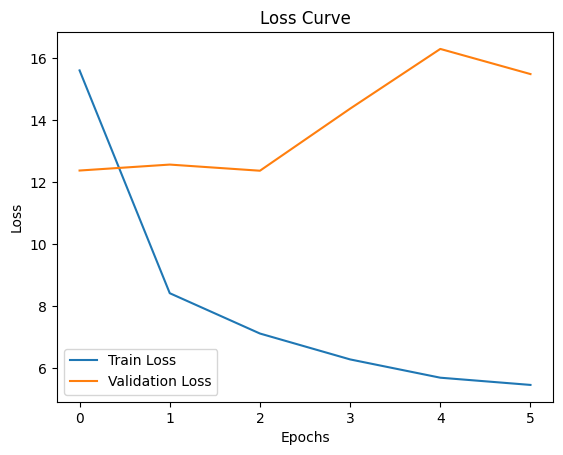

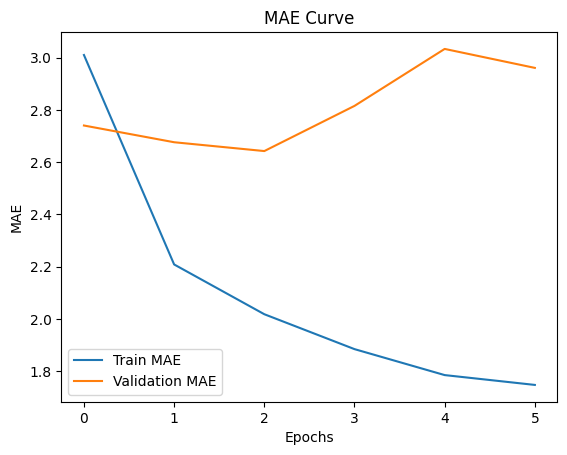

In [68]:

# Plot the loss curves for training and validation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# plot the MAE curves for training and validation
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE Curve')
plt.legend()
plt.show()


In [71]:

y_pred = model.predict(X_test)



114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [73]:
# Flatten the predictions
y_pred = y_pred.flatten()
test_ids = df_test['id']
#Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test_ids,  
    'bg+1:00': y_pred
})


# Save the submission file
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission file
print(submission_df.head(10))


         id    bg+1:00
0  p01_8459   8.586841
1  p01_8460   7.228576
2  p01_8461   8.520651
3  p01_8462  10.022117
4  p01_8463   5.587944
5  p01_8464   6.656237
6  p01_8465   7.536632
7  p01_8466   8.515521
8  p01_8467  10.228610
9  p01_8468   8.178960


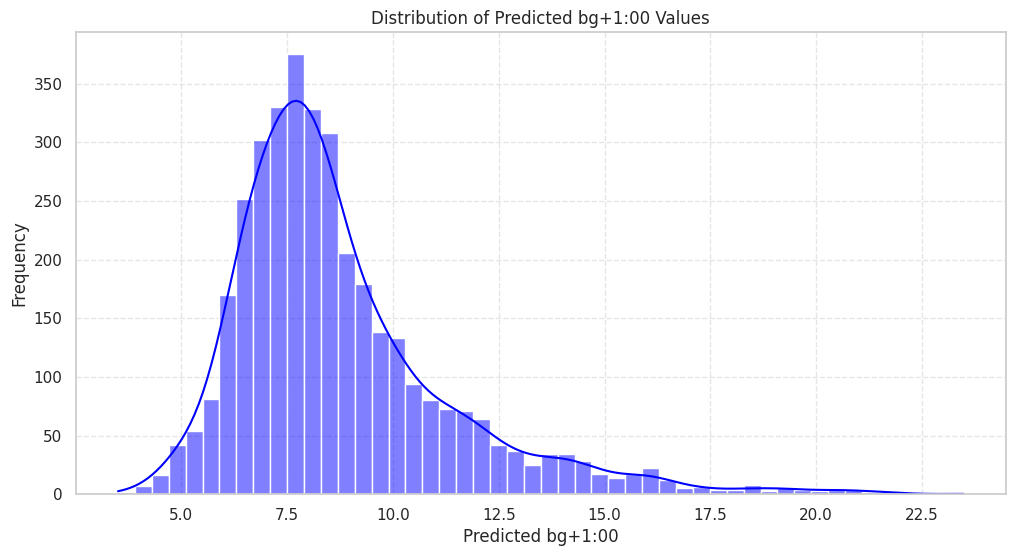

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(submission_df['bg+1:00'], bins=50, kde=True, color='blue')
plt.title('Distribution of Predicted bg+1:00 Values')
plt.xlabel('Predicted bg+1:00')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



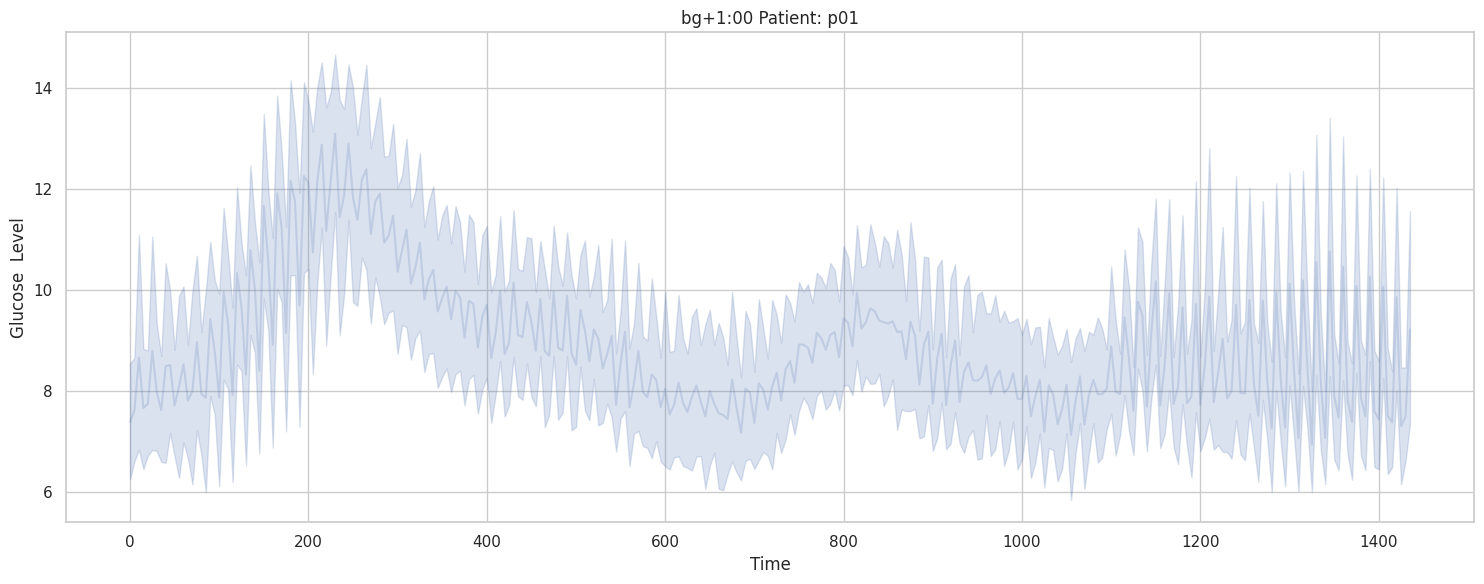

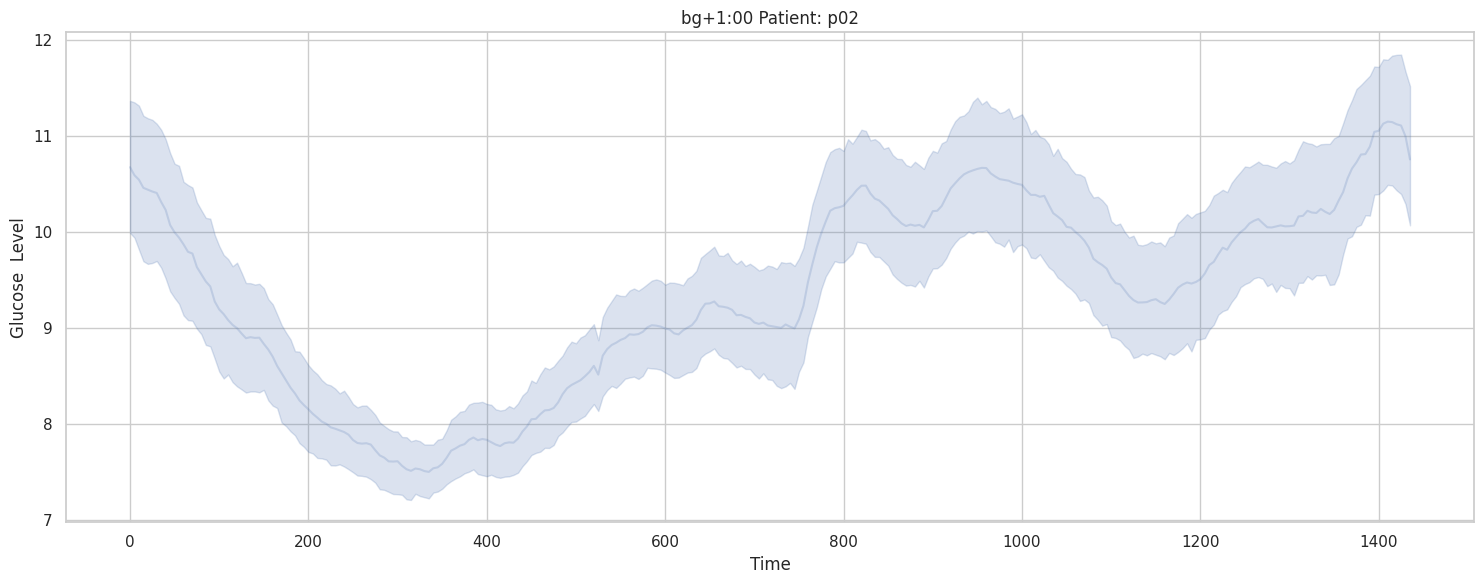

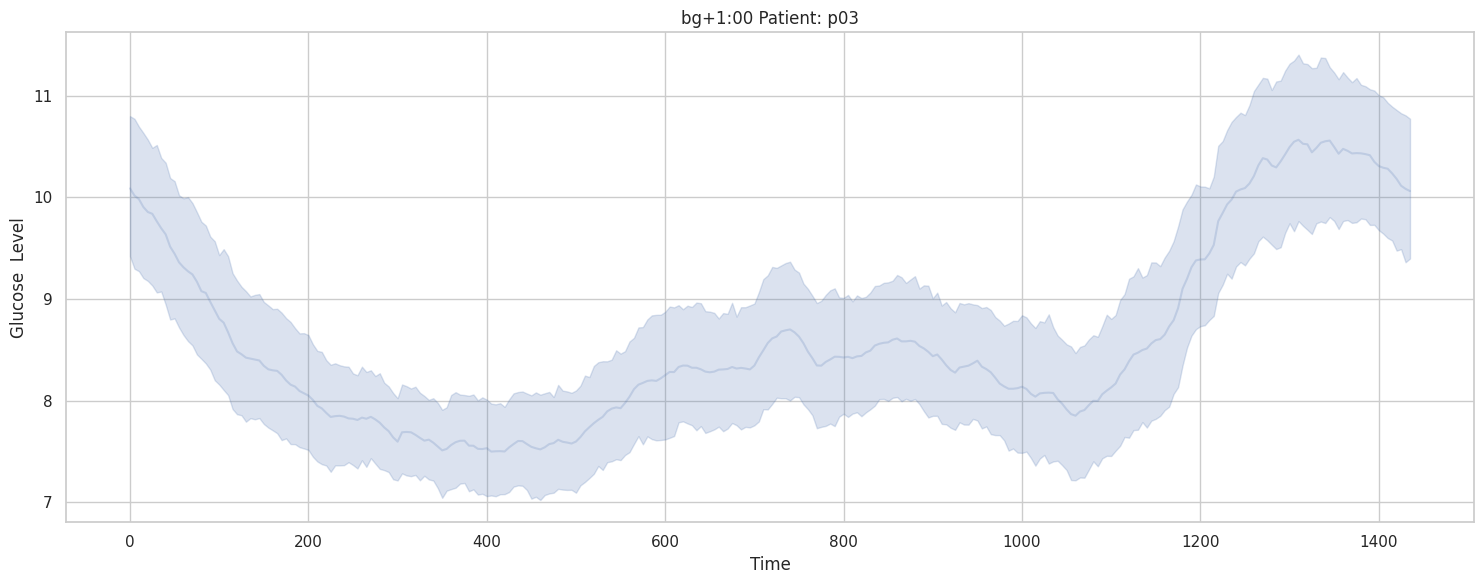

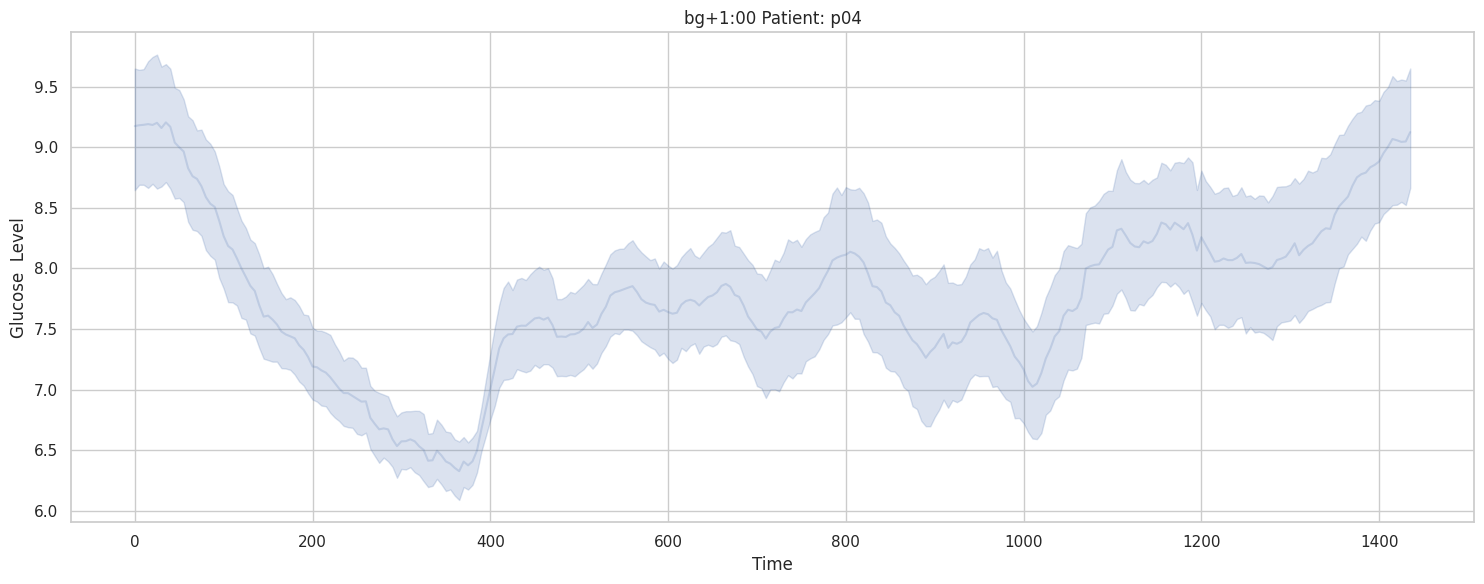

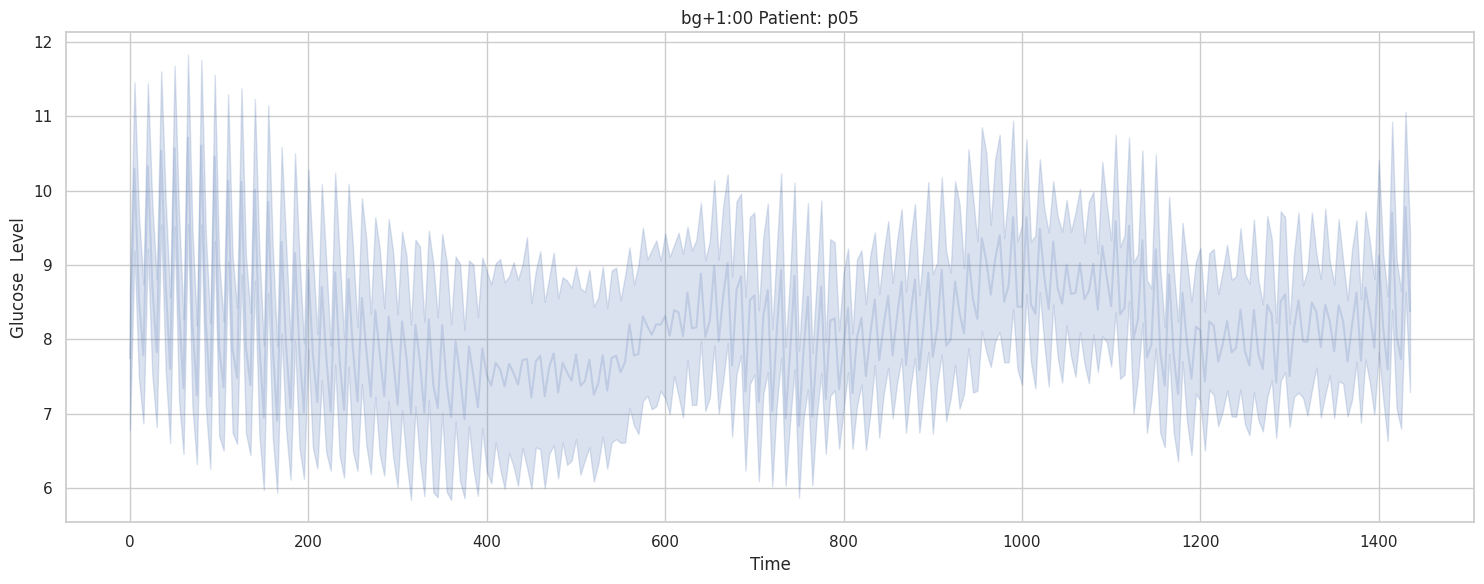

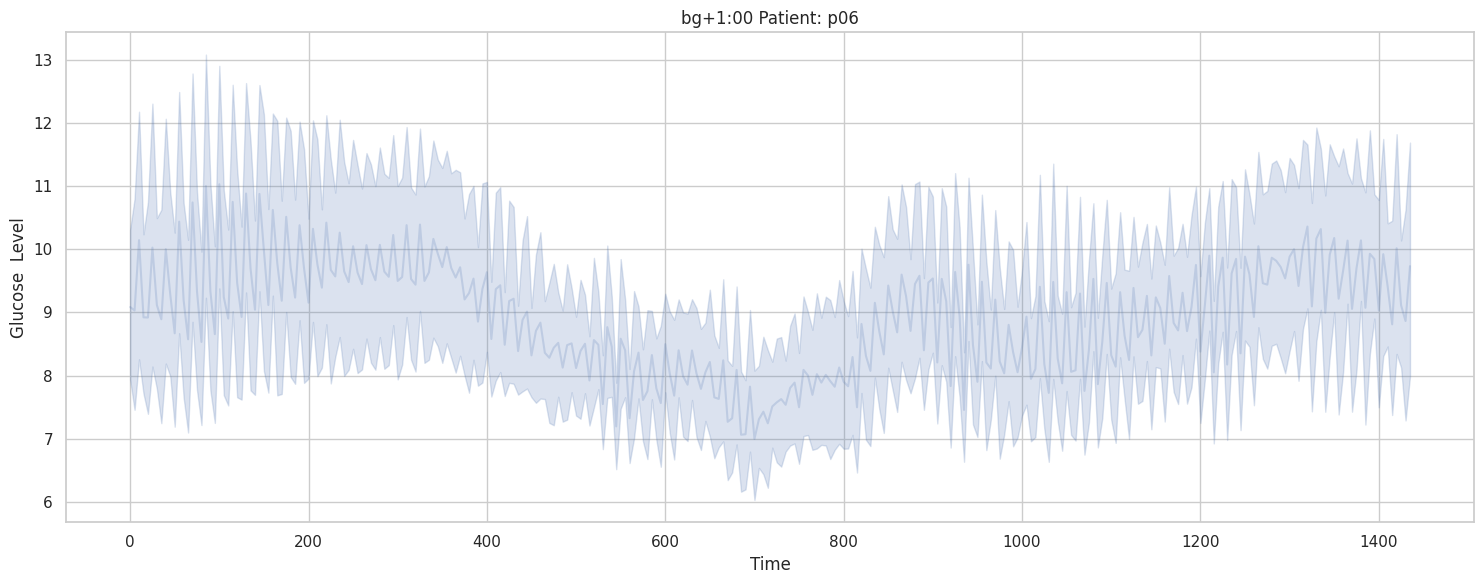

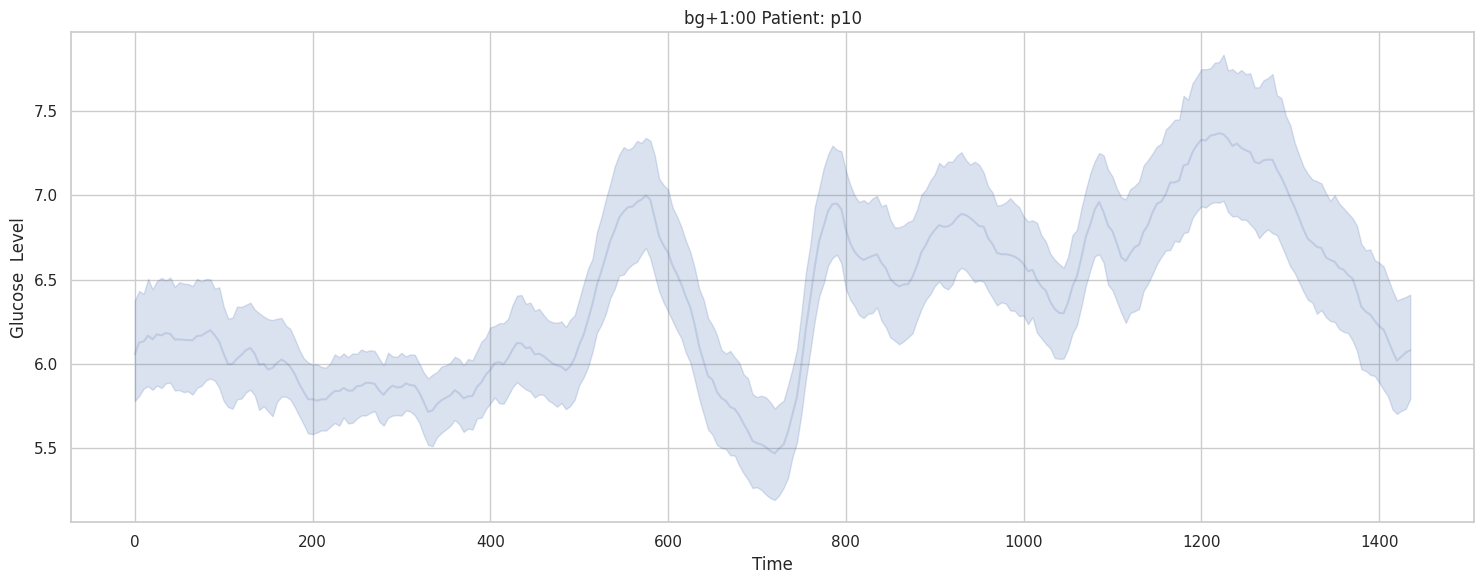

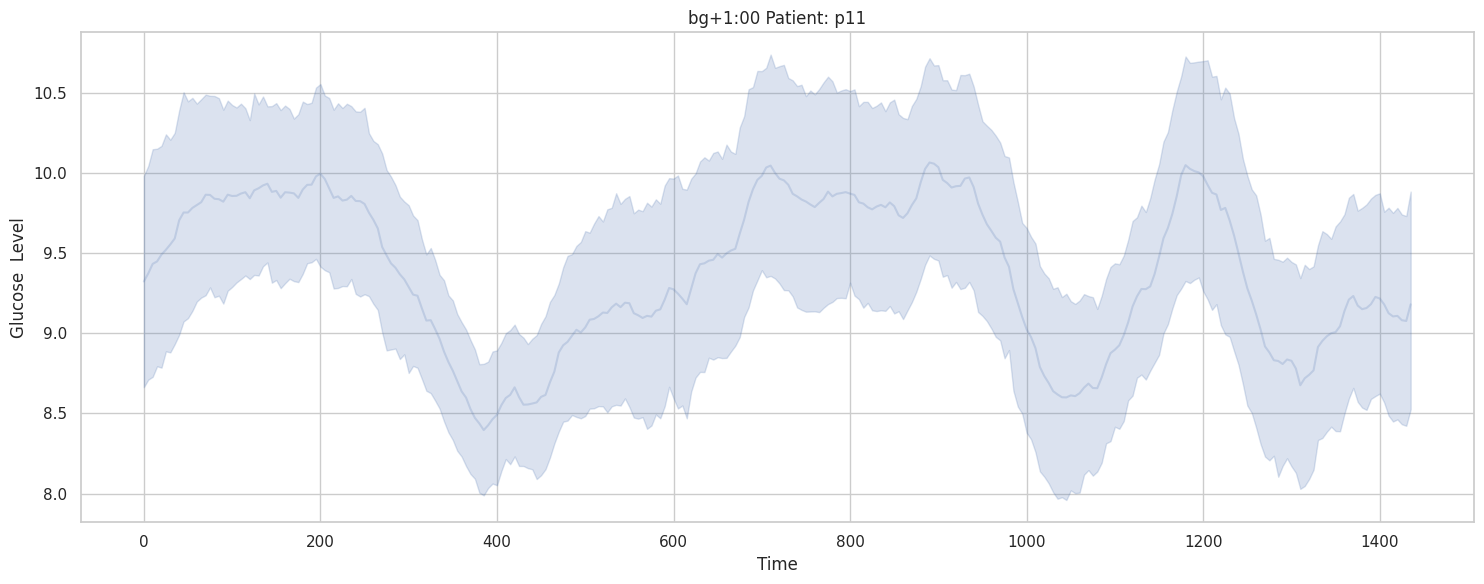

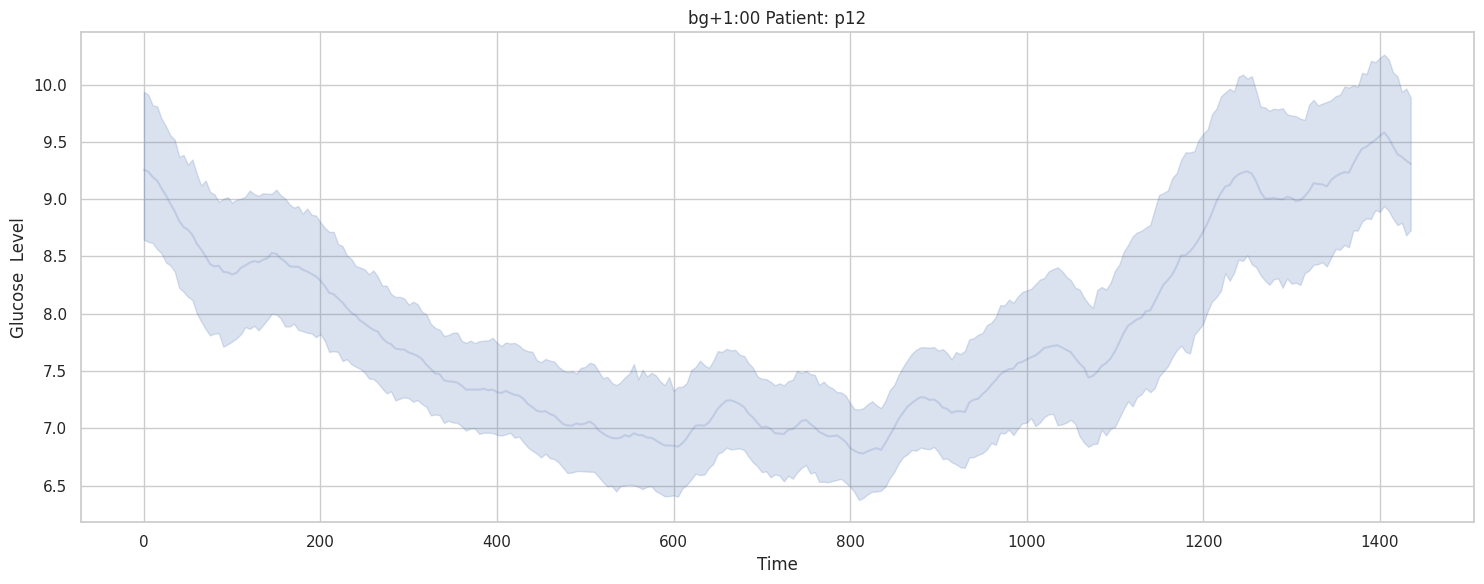

In [75]:
for p_num in train['p_num'].unique():
    plt.figure(figsize = (15, 6))
    df = train[train['p_num'] == p_num]
    sns.lineplot(x = 'time_min', y = target, data = df, alpha = 0.2)
    plt.title(target + ' Patient: ' + p_num)
    plt.xlabel('Time')
    plt.ylabel('Glucose  Level')
    plt.tight_layout() 
    plt.show()

In [82]:
# 将预测值添加到test数据框中
test['bg+1:00_pred'] = y_pred

# 显示前几行以确认拼接结果
test.head()


id p_num                time  bg-5:55  bg-5:50   bg-5:45   bg-5:40  \
0  p01_8459   p01 1900-01-01 06:45:00      9.2      9.2  9.533333  9.866667   
1  p01_8460   p01 1900-01-01 11:25:00      9.9      9.9  9.900000  9.733333   
2  p01_8461   p01 1900-01-01 14:45:00      5.5      5.5  5.500000  5.500000   
3  p01_8462   p01 1900-01-01 04:30:00      3.4      3.4  3.566667  3.733333   
4  p01_8463   p01 1900-01-01 04:20:00      8.3      8.3  8.300000  8.866667   

     bg-5:35    bg-5:30    bg-5:25  ...  activity-0:20  activity-0:15  \
0  10.200000  10.233333  10.266667  ...              9              9   
1   9.566667   9.400000   9.300000  ...              9              9   
2   5.500000   5.400000   5.300000  ...              9              9   
3   3.900000   4.166667   4.433333  ...              9              9   
4   9.433333  10.000000  10.733333  ...              9              9   

   activity-0:10  activity-0:05  activity-0:00  hour  time_min  sin_time  \
0              8              9              7     6       405  0.980785   
1              9             10              8    11       685  0.152123   
2              8              9              7    14       885 -0.659346   
3              8              9              7     4       270  0.923880   
4              8              9              7     4       260  0.906308   

   cos_time  bg+1:00_pred  
0 -0.195090      8.586841  
1 -0.988362      7.228576  
2 -0.751840      8.520651  
3  0.382683     10.022117  
4  0.422618      5.587944  

[5 rows x 512 columns]

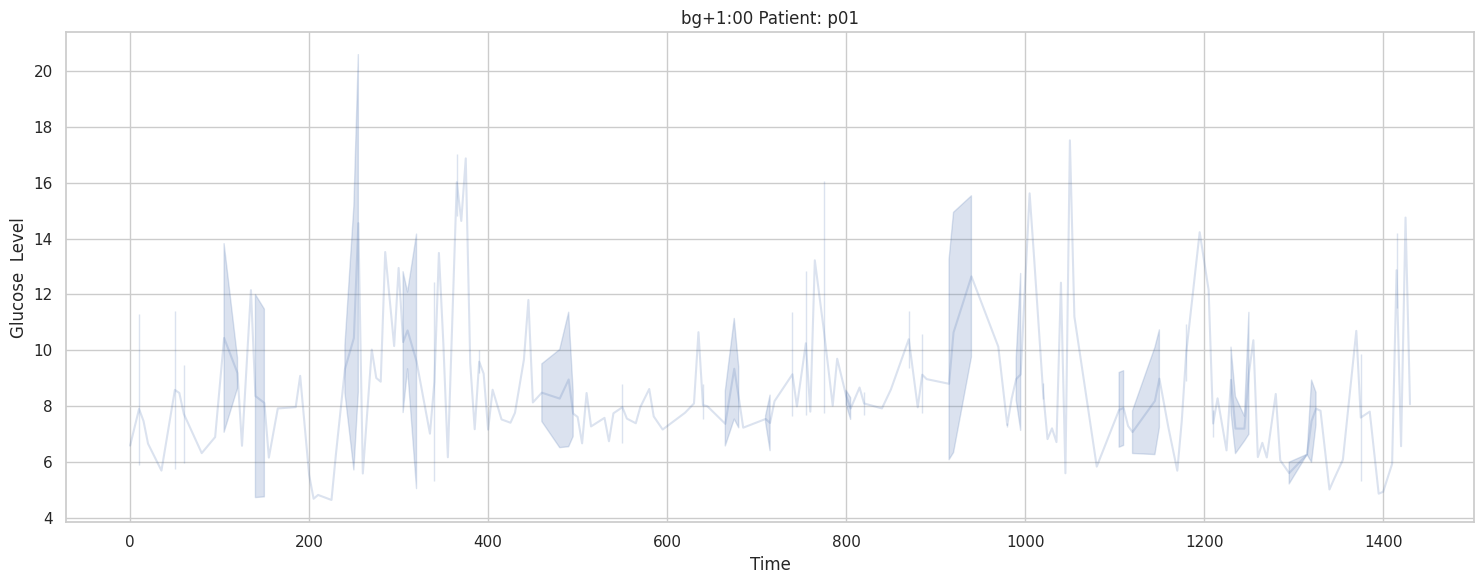

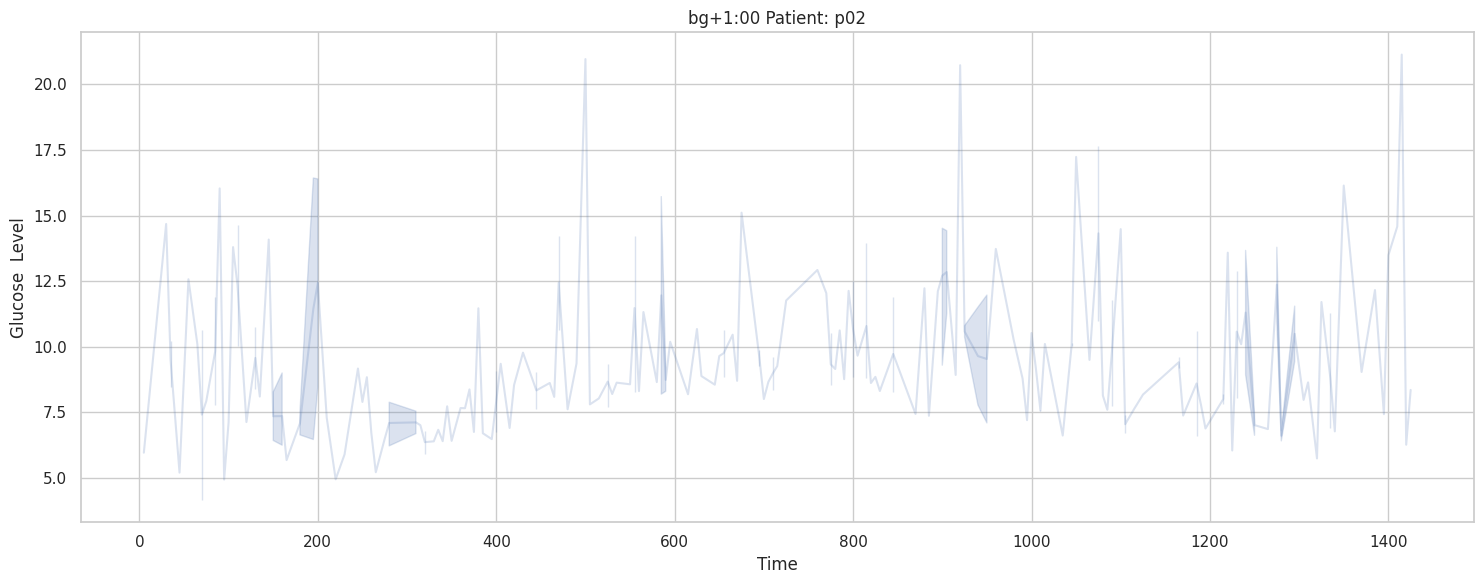

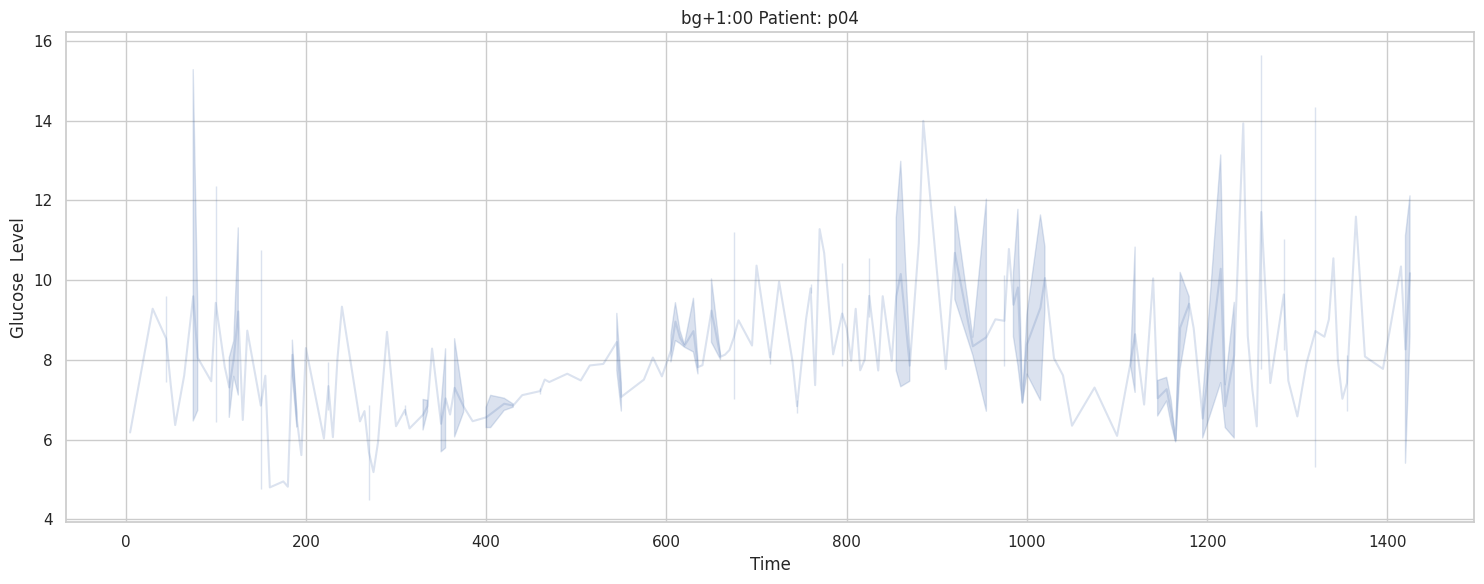

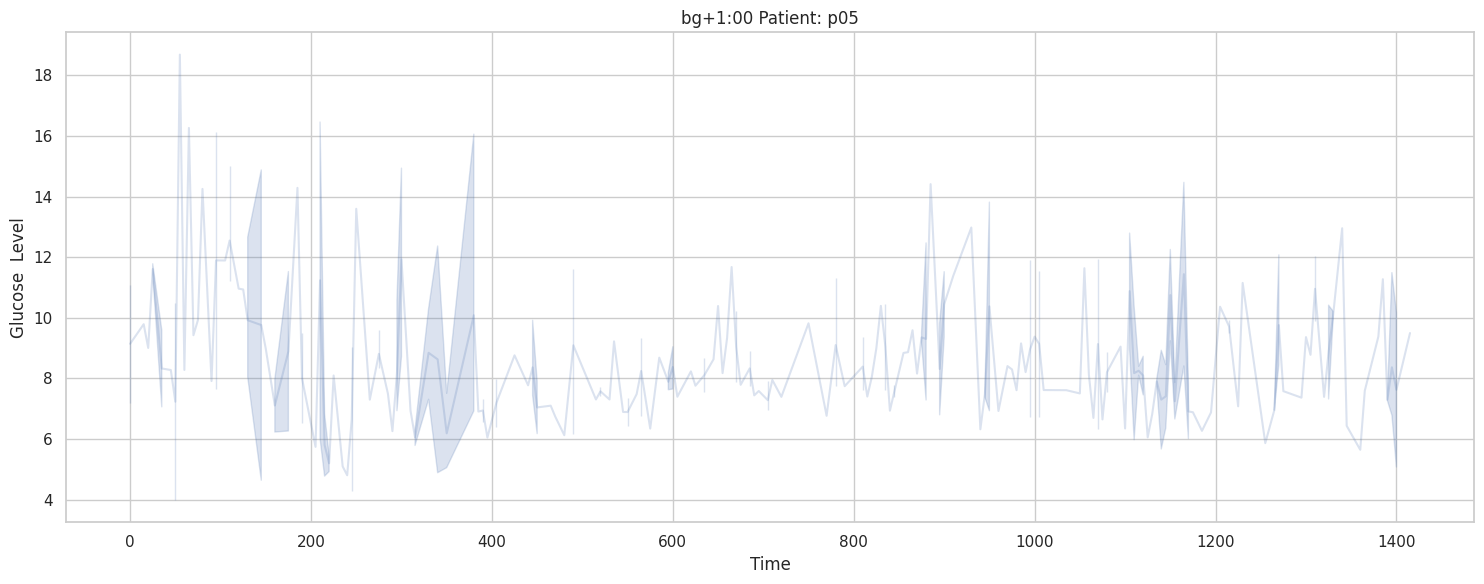

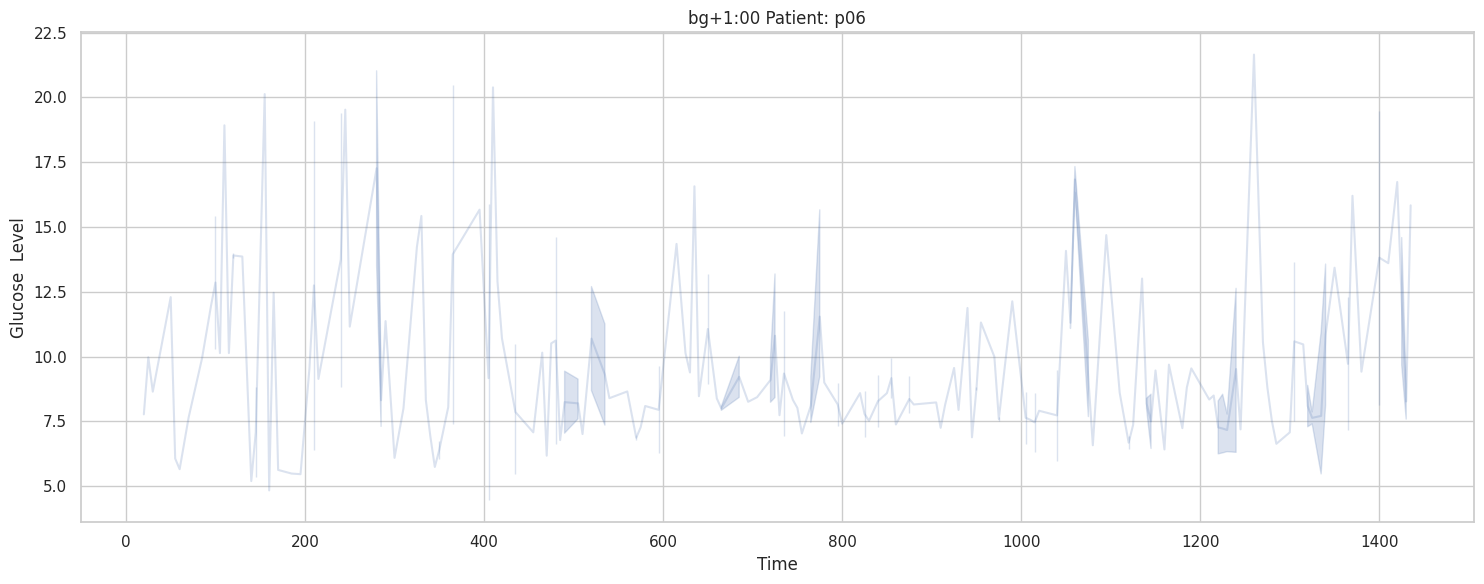

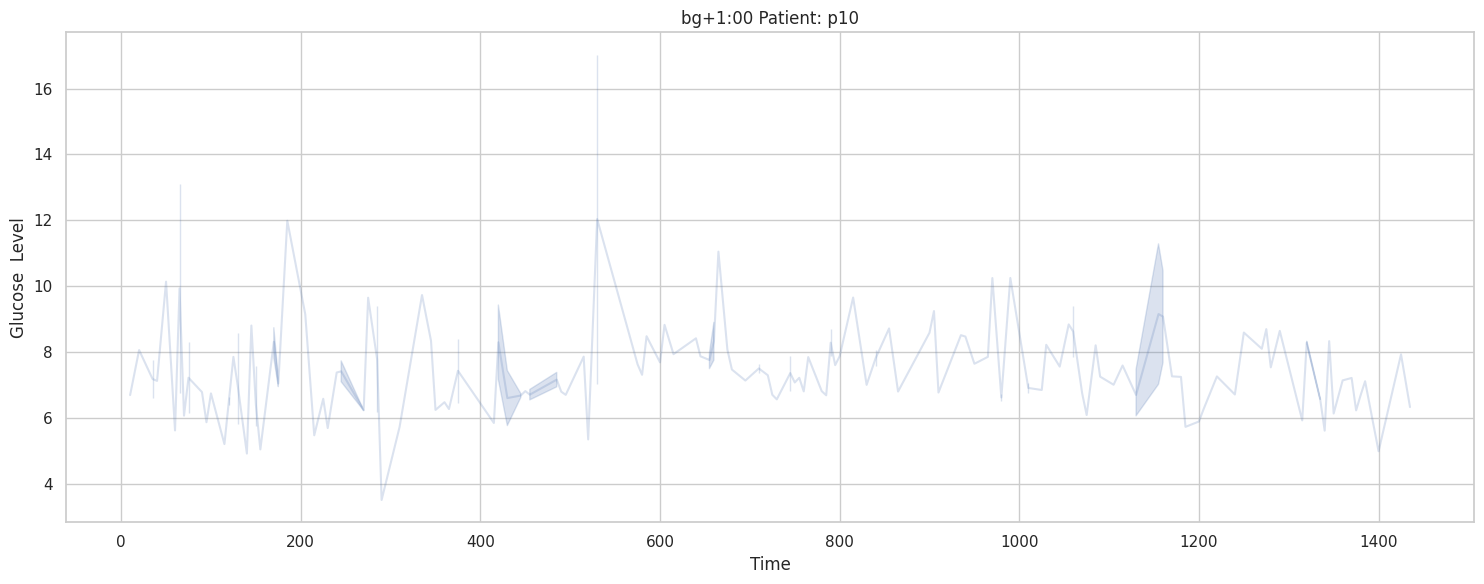

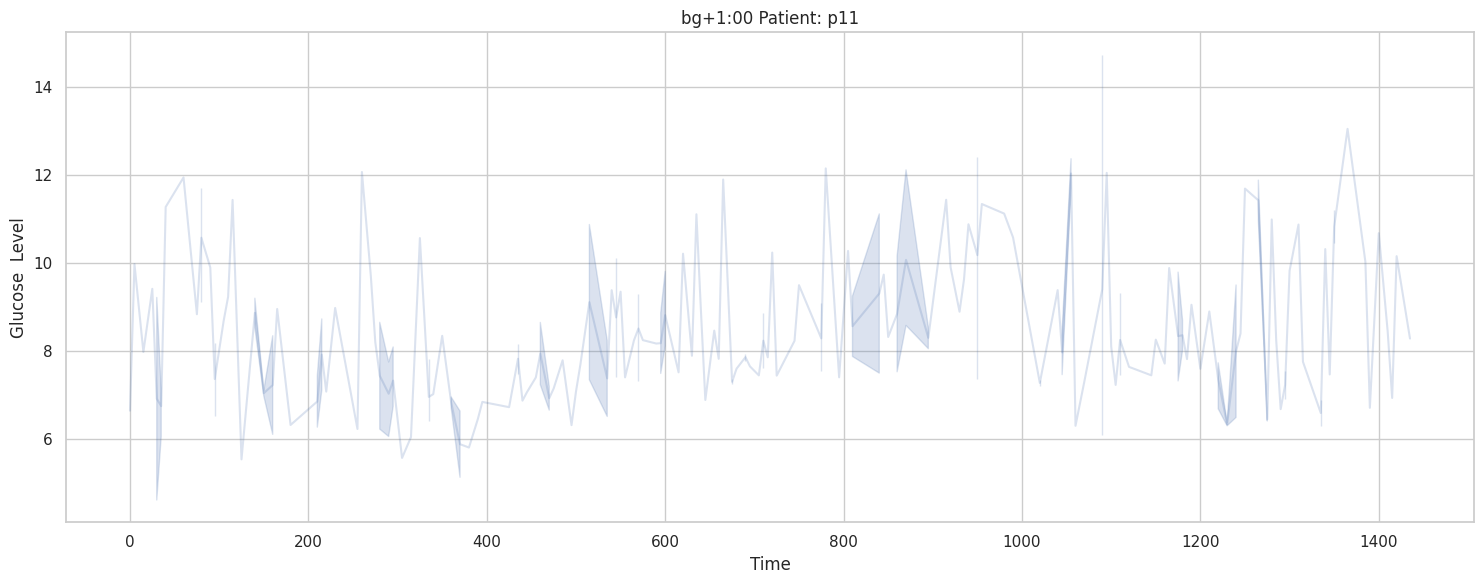

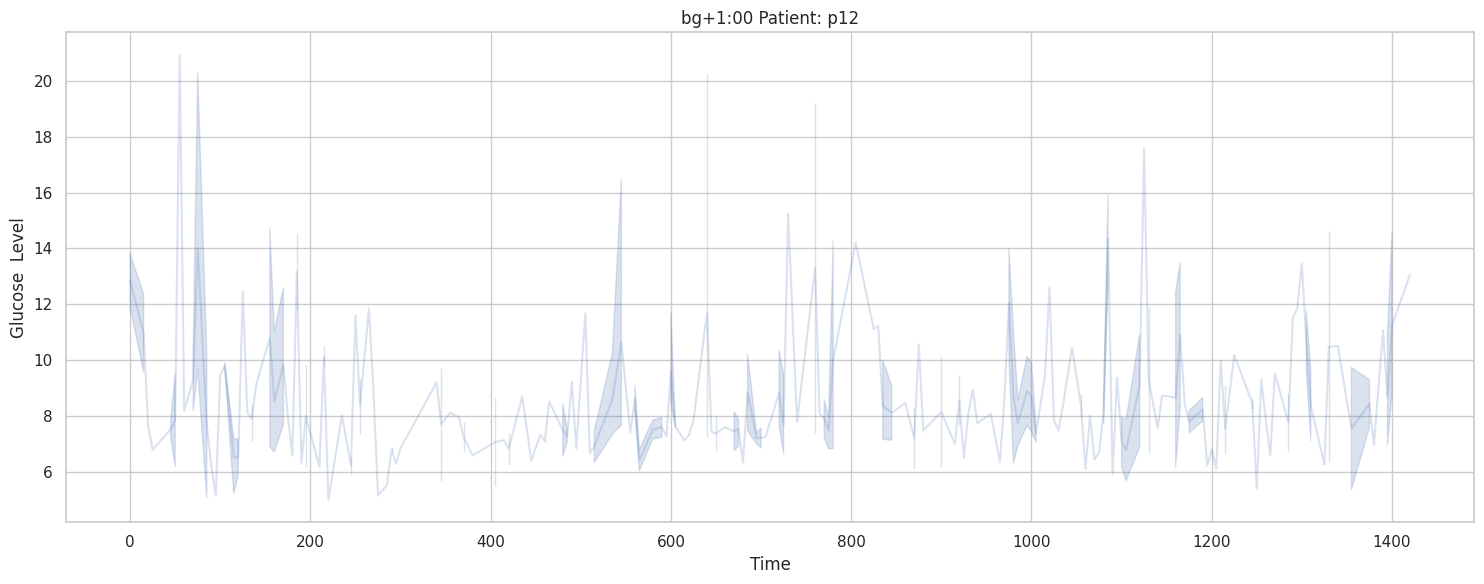

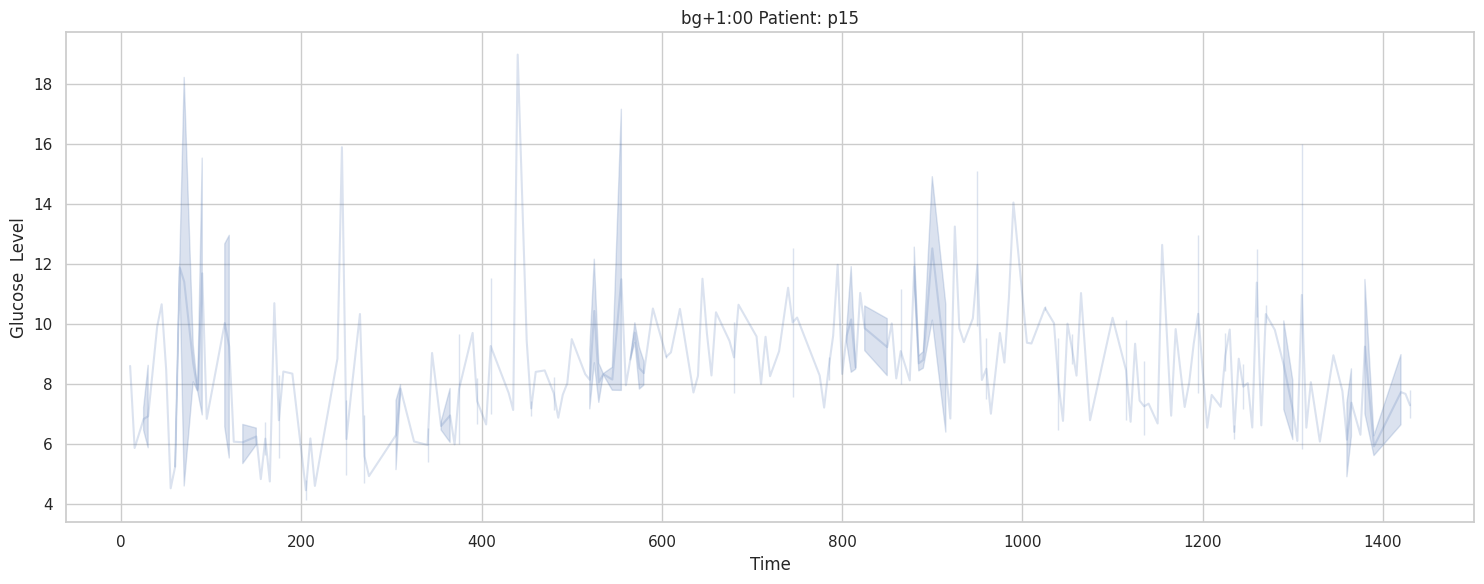

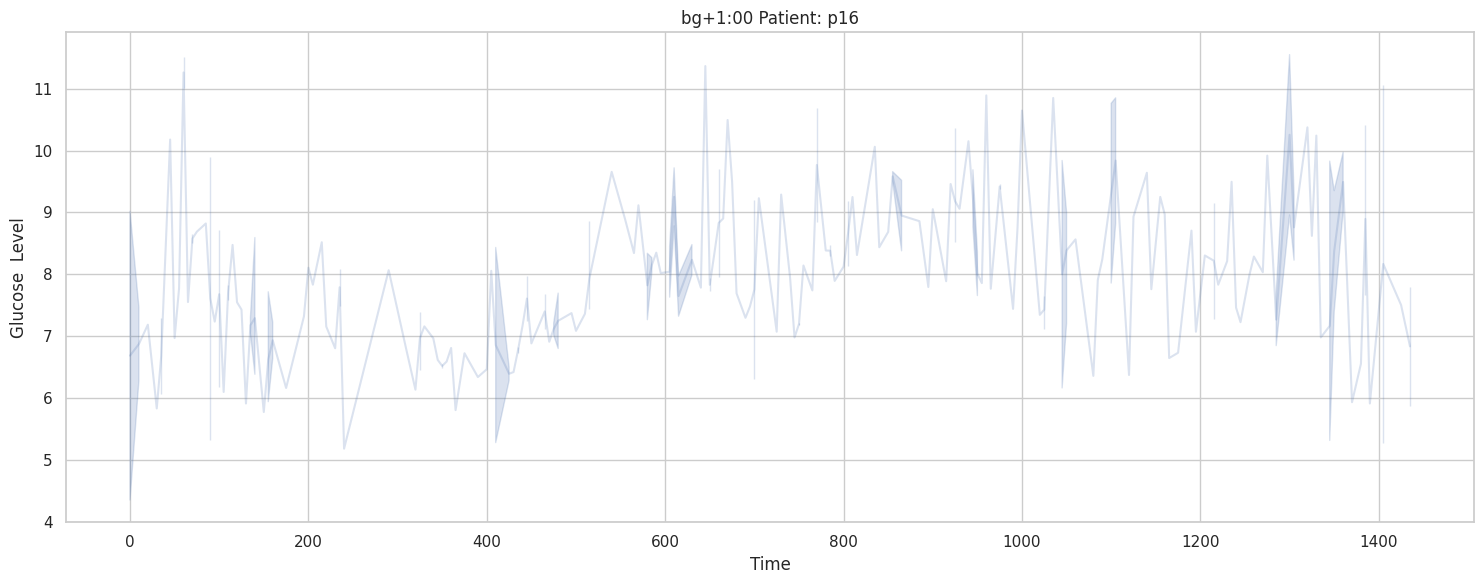

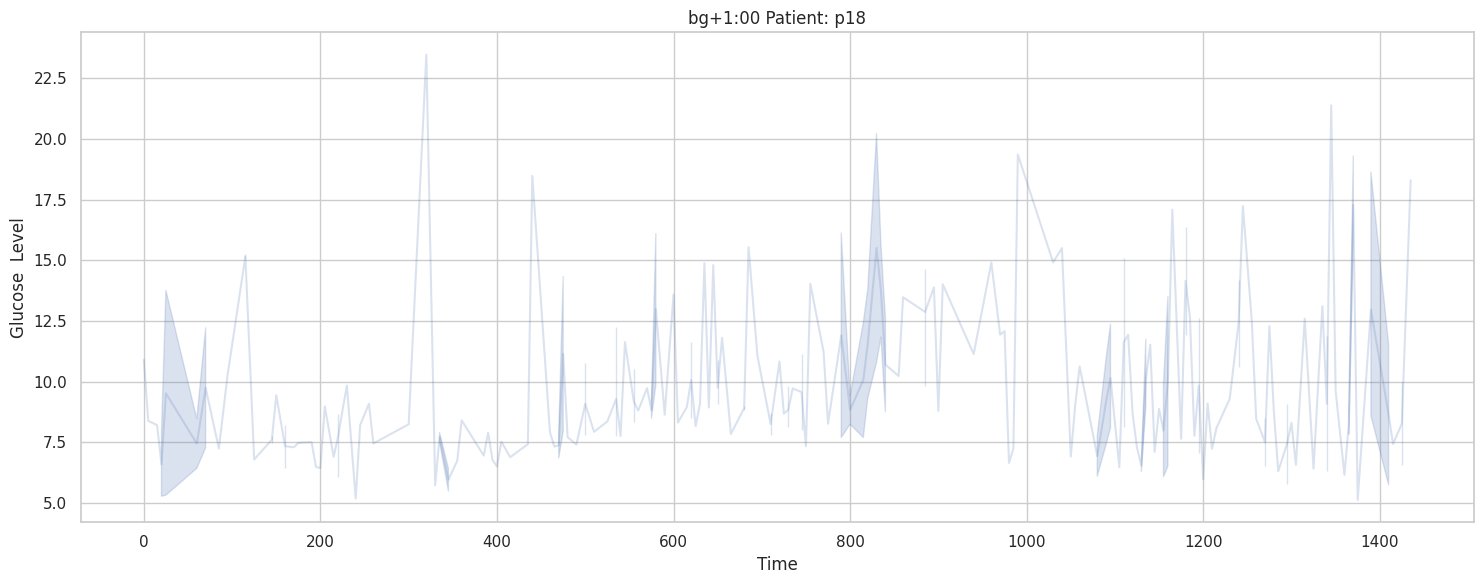

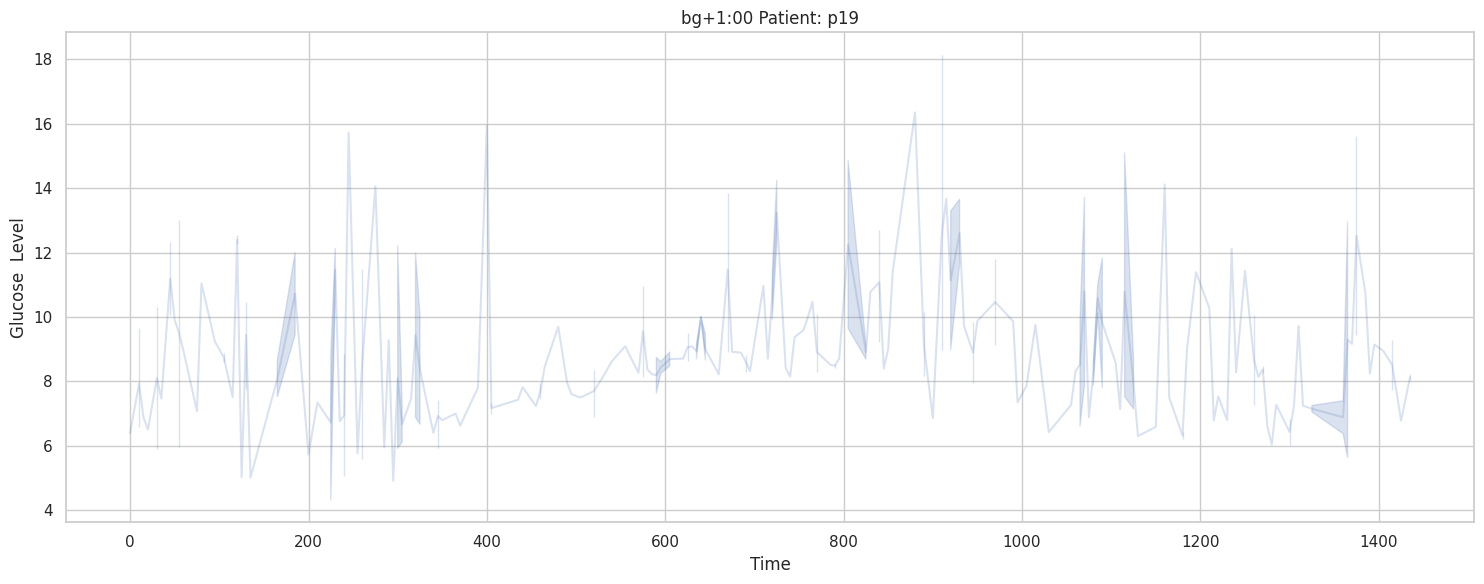

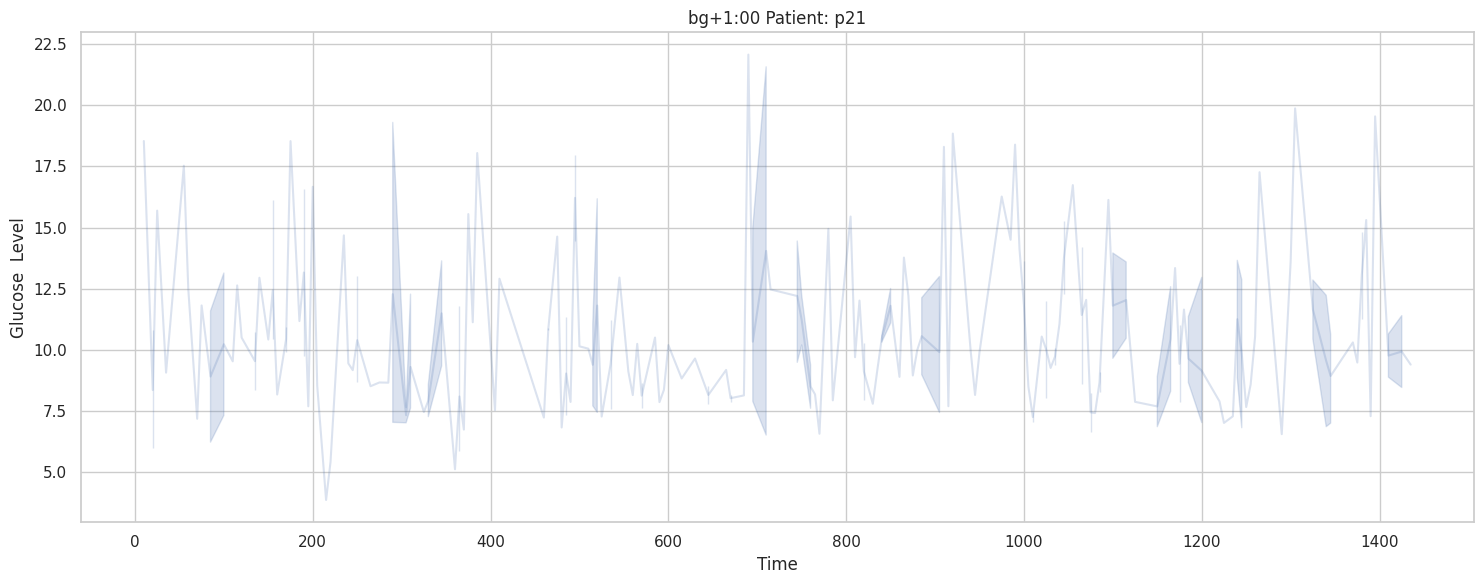

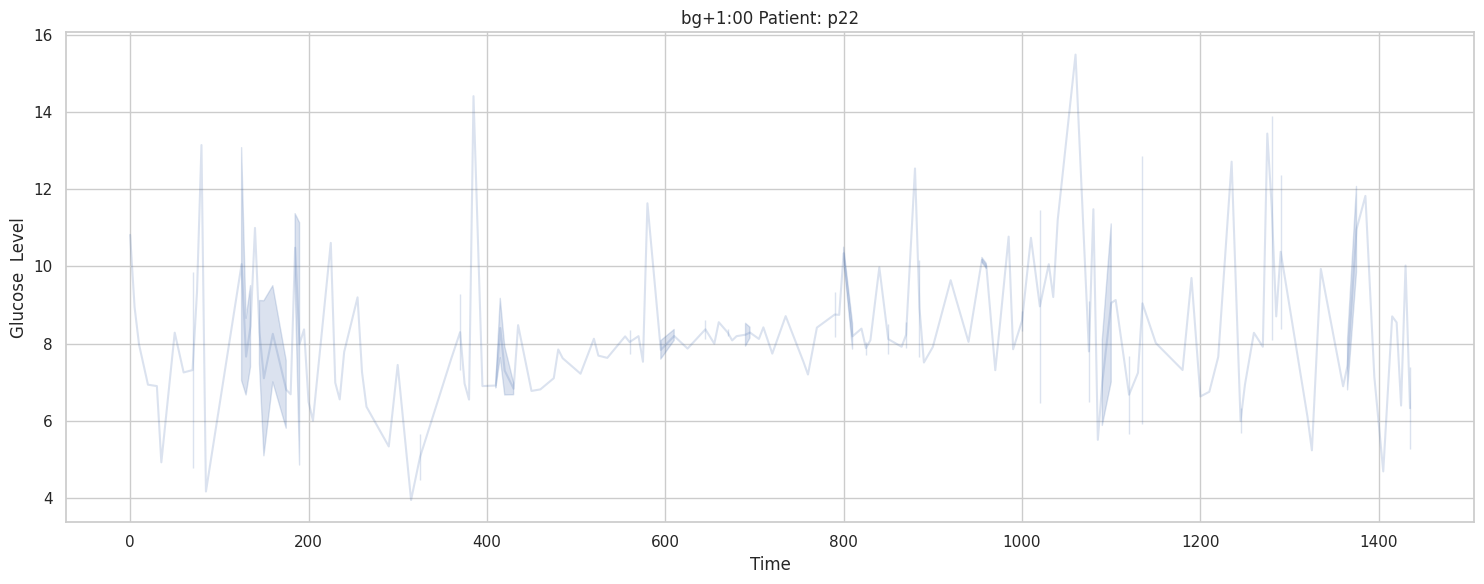

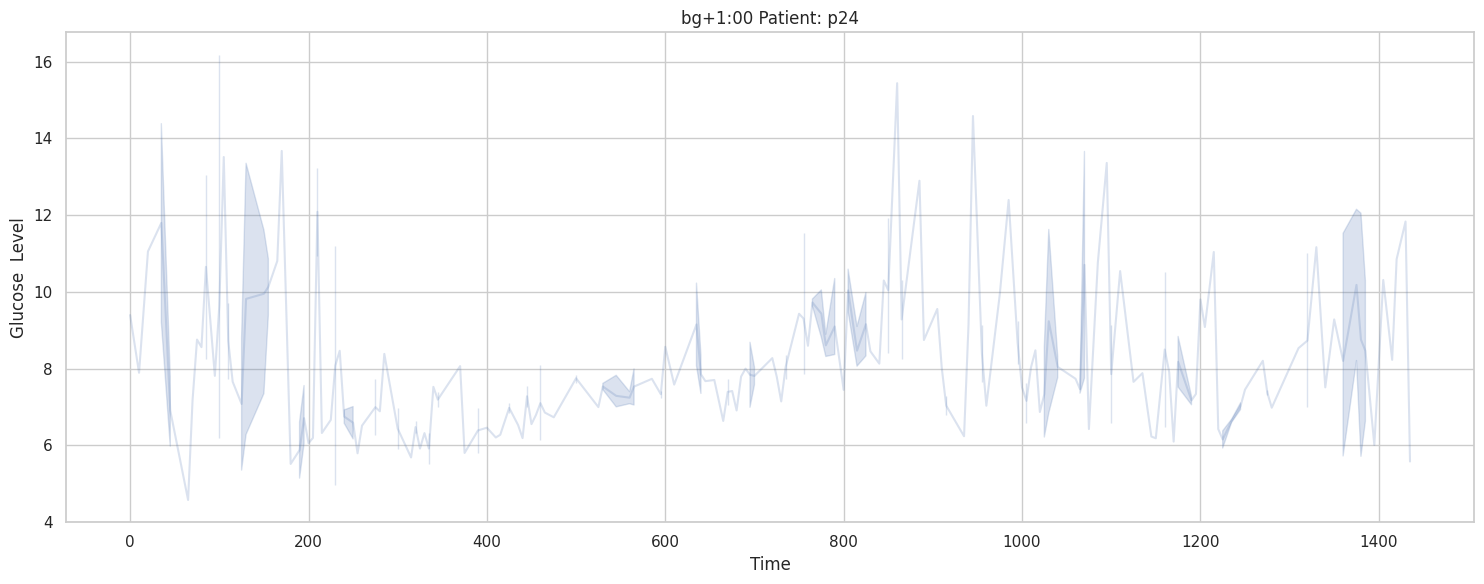

In [83]:
for p_num in test['p_num'].unique():
    plt.figure(figsize = (15, 6))
    df = test[test['p_num'] == p_num]
    sns.lineplot(x = 'time_min', y = 'bg+1:00_pred', data = df, alpha = 0.2)
    plt.title(target + ' Patient: ' + p_num)
    plt.xlabel('Time')
    plt.ylabel('Glucose  Level')
    plt.tight_layout() 
    plt.show()